# Advanced Regression
## 

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house. 


**So interpretation is important!**

### Install dependencies


In [1]:
!pip install scikit-learn
!pip install statsmodels


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Step 1: Reading and Understanding the Data



In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

## Data Definition

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

In [4]:
housing_df = pd.read_csv("https://ml-course3-upgrad.s3.amazonaws.com/Assignment_+Advanced+Regression/train.csv")

In [5]:
# Check the head of the dataset
housing_df.head(10)
#housing_df = housing_df[housing_df['GrLivArea'] < 4000]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Inspect the various aspects of the dataset

In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
print(housing_df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the continuous numeric variables

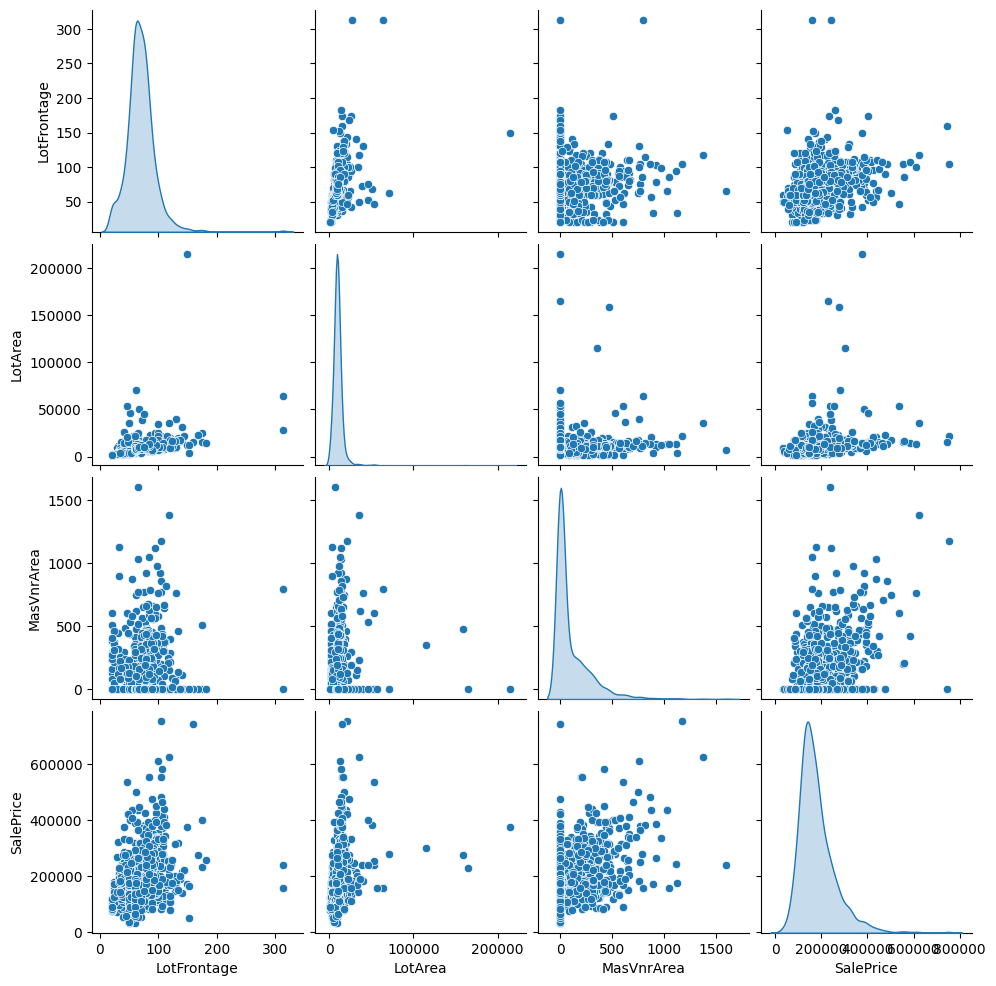

In [9]:
#numeric_cols = housing_df.select_dtypes(include=['number']).columns.tolist()
#print(f'Numeric Columns List: {numeric_cols}')
numeric_cols = ['LotFrontage', 'LotArea', 'MasVnrArea',   'SalePrice']
sns.pairplot(housing_df[numeric_cols],diag_kind='kde')
plt.show()

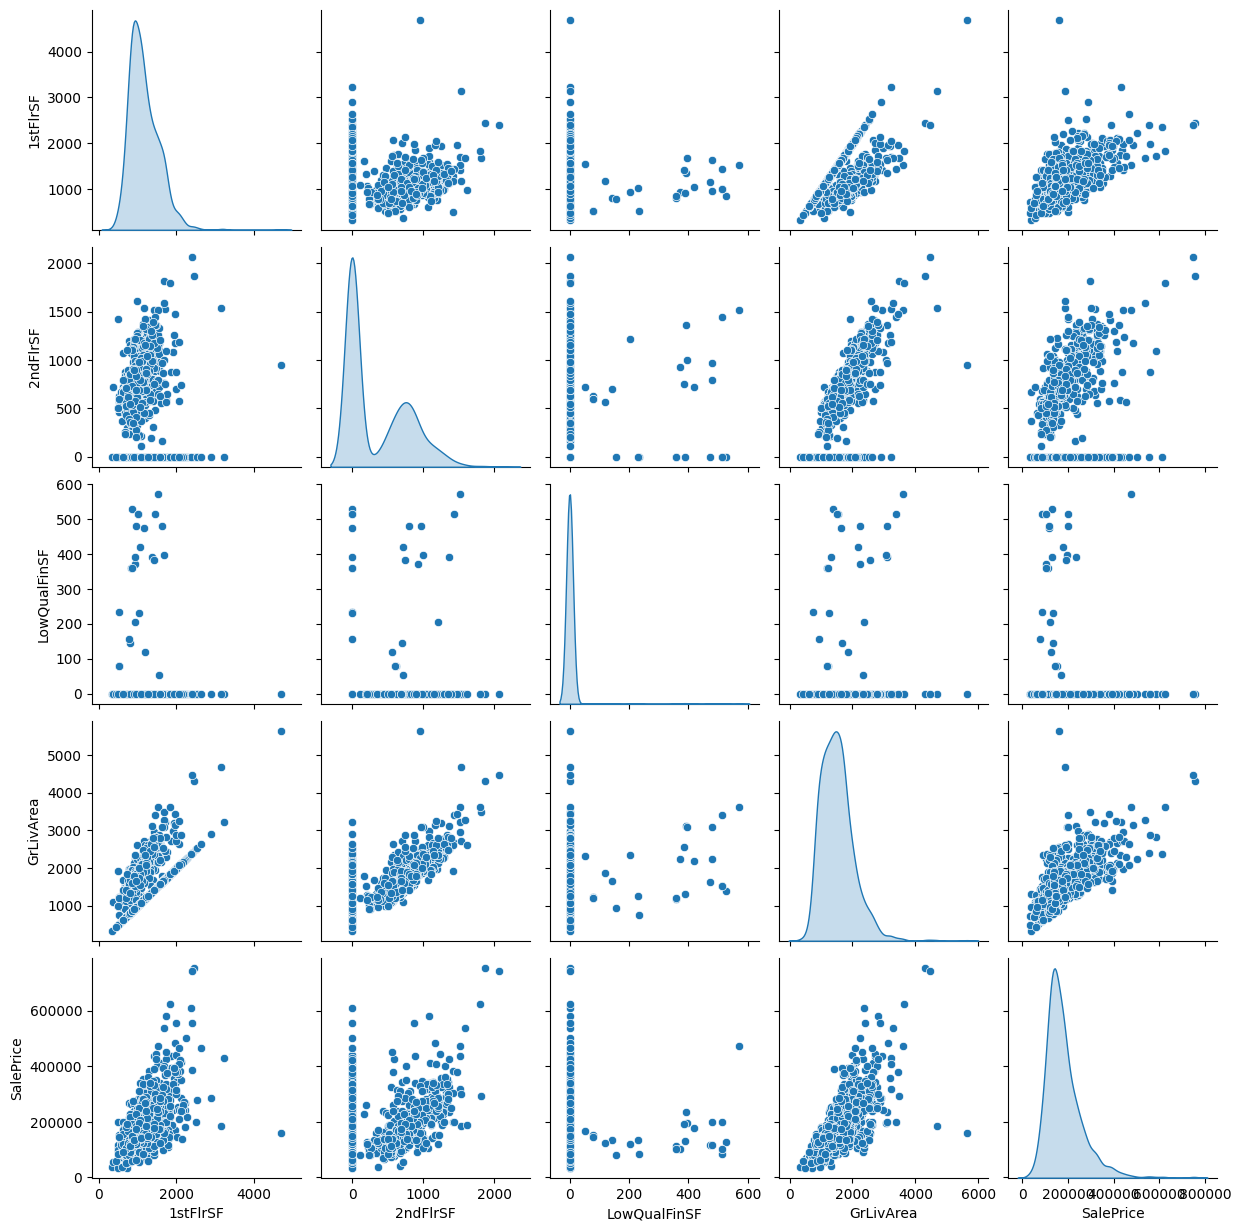

In [10]:
numeric_cols = ['1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea','SalePrice']
sns.pairplot(housing_df[numeric_cols],diag_kind='kde')
plt.show()

In [11]:
low_qual_counts = housing_df['LowQualFinSF'].value_counts()
print(low_qual_counts)

LowQualFinSF
0      1434
80        3
360       2
205       1
479       1
397       1
514       1
120       1
481       1
232       1
53        1
515       1
156       1
473       1
420       1
390       1
371       1
392       1
144       1
572       1
528       1
234       1
513       1
384       1
Name: count, dtype: int64


We can convert the column LowQualFinSF to categorical binary to retain this feature.

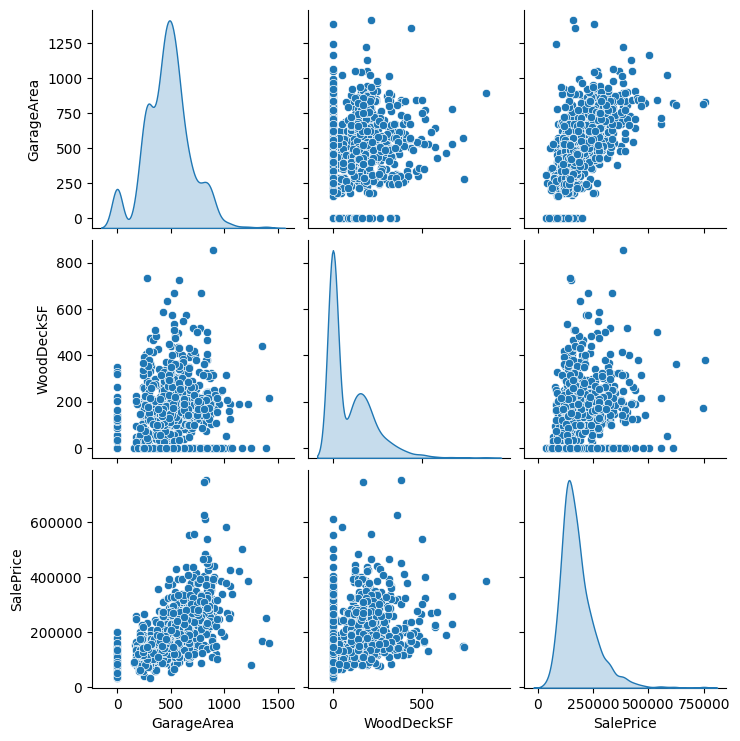

In [12]:
numeric_cols = [ 'GarageArea', 'WoodDeckSF', 'SalePrice']
sns.pairplot(housing_df[numeric_cols],diag_kind='kde')
plt.show()

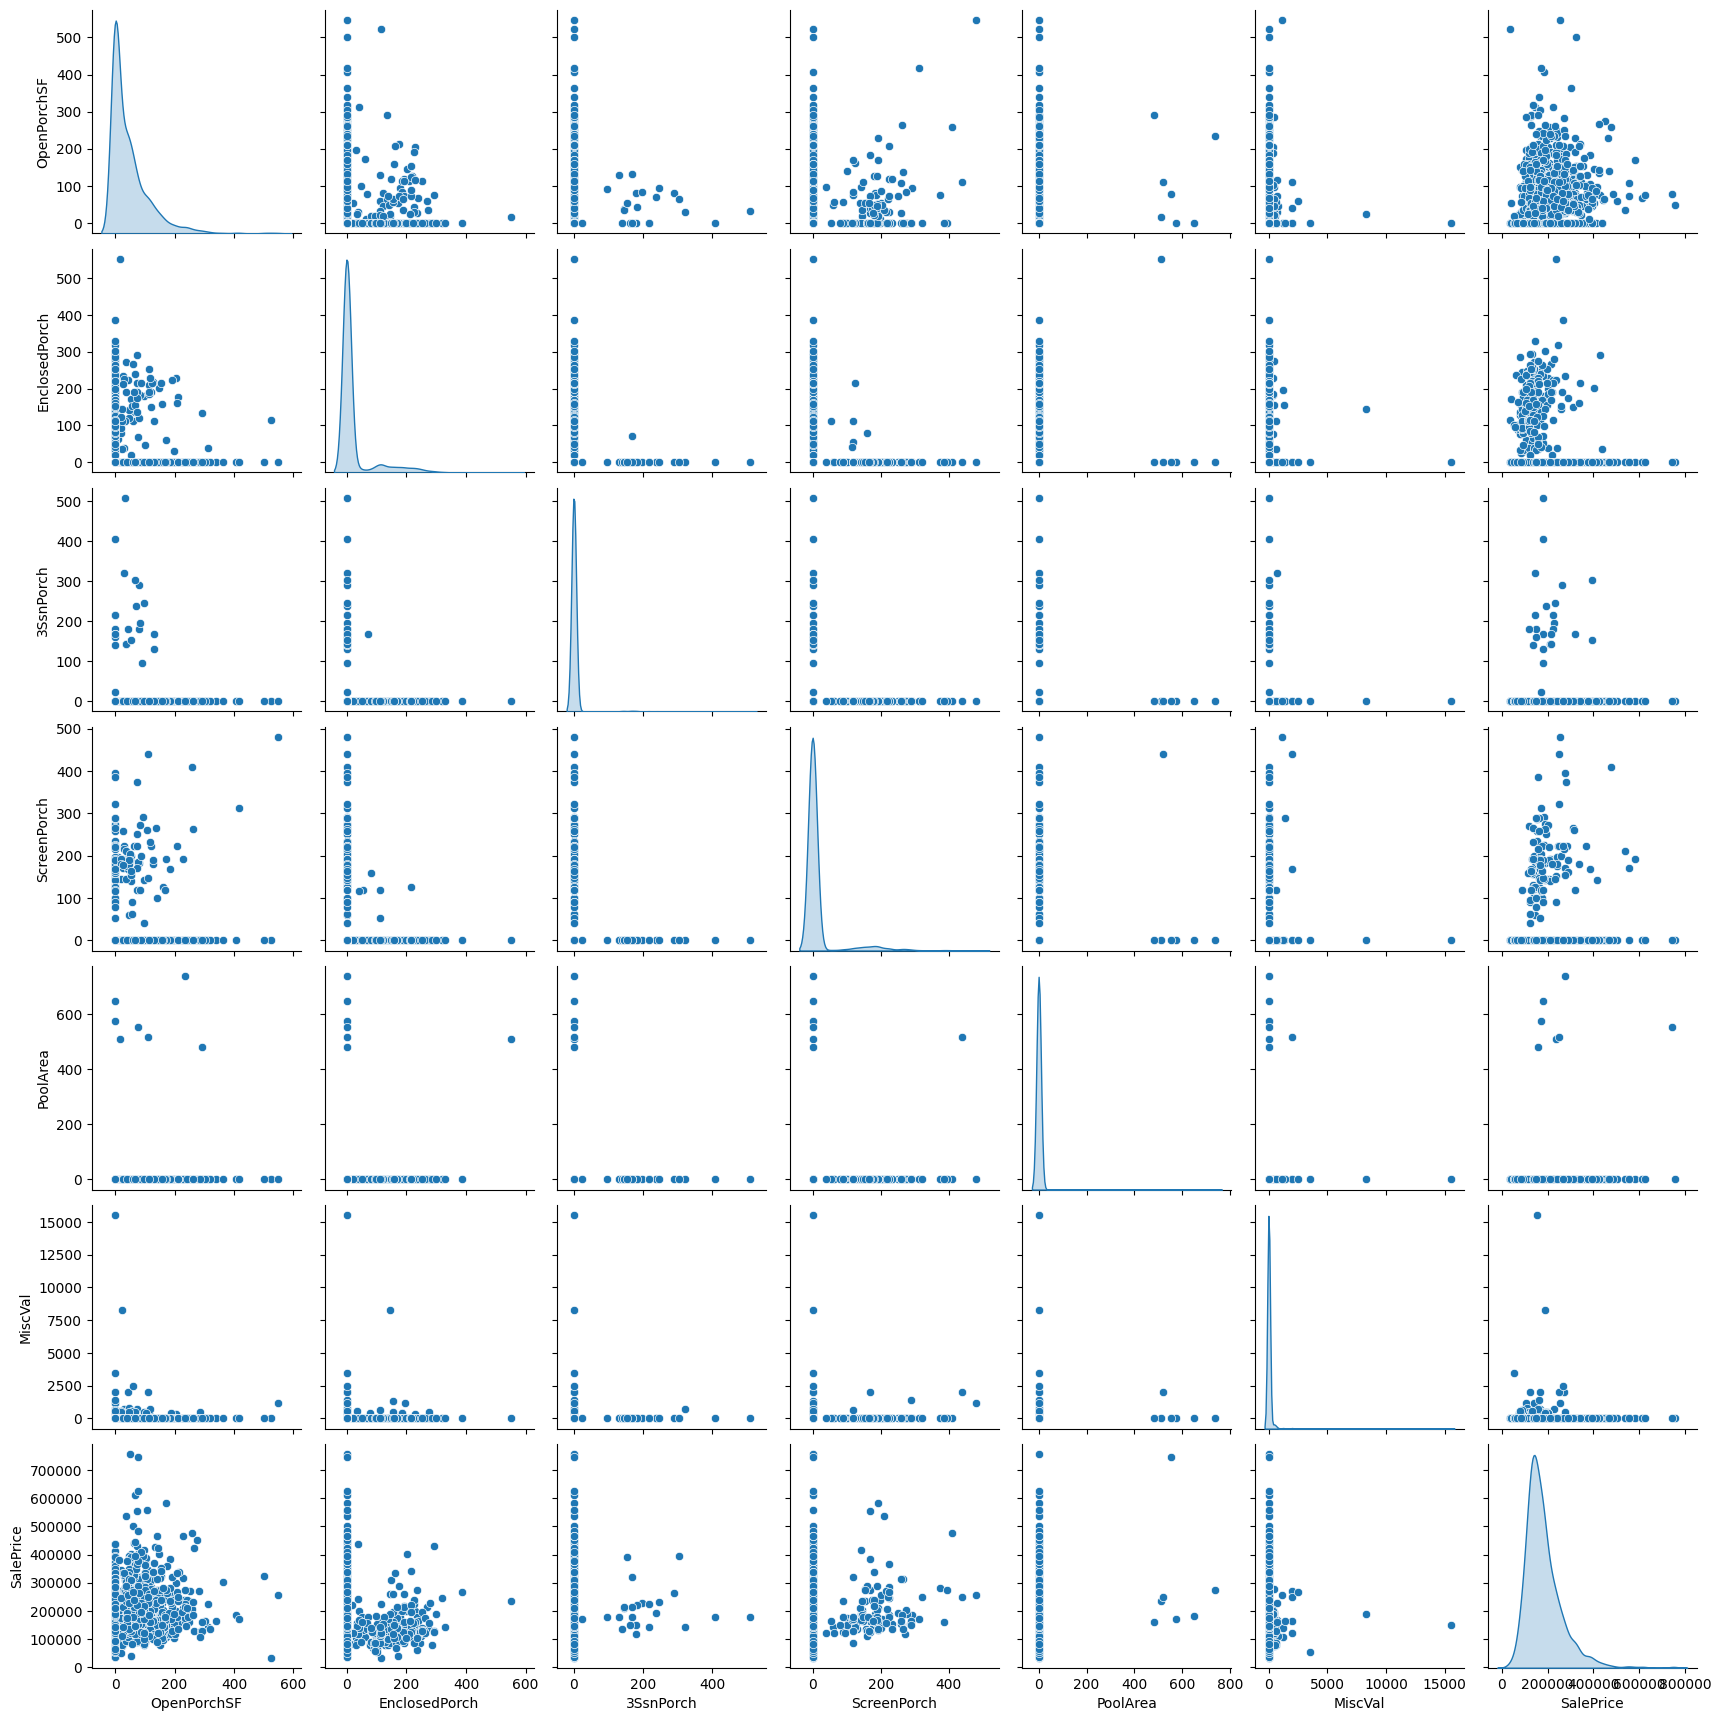

In [13]:
numeric_cols = ['OpenPorchSF', 'EnclosedPorch', 
                '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
                'SalePrice']
sns.pairplot(housing_df[numeric_cols],diag_kind='kde')
plt.show()

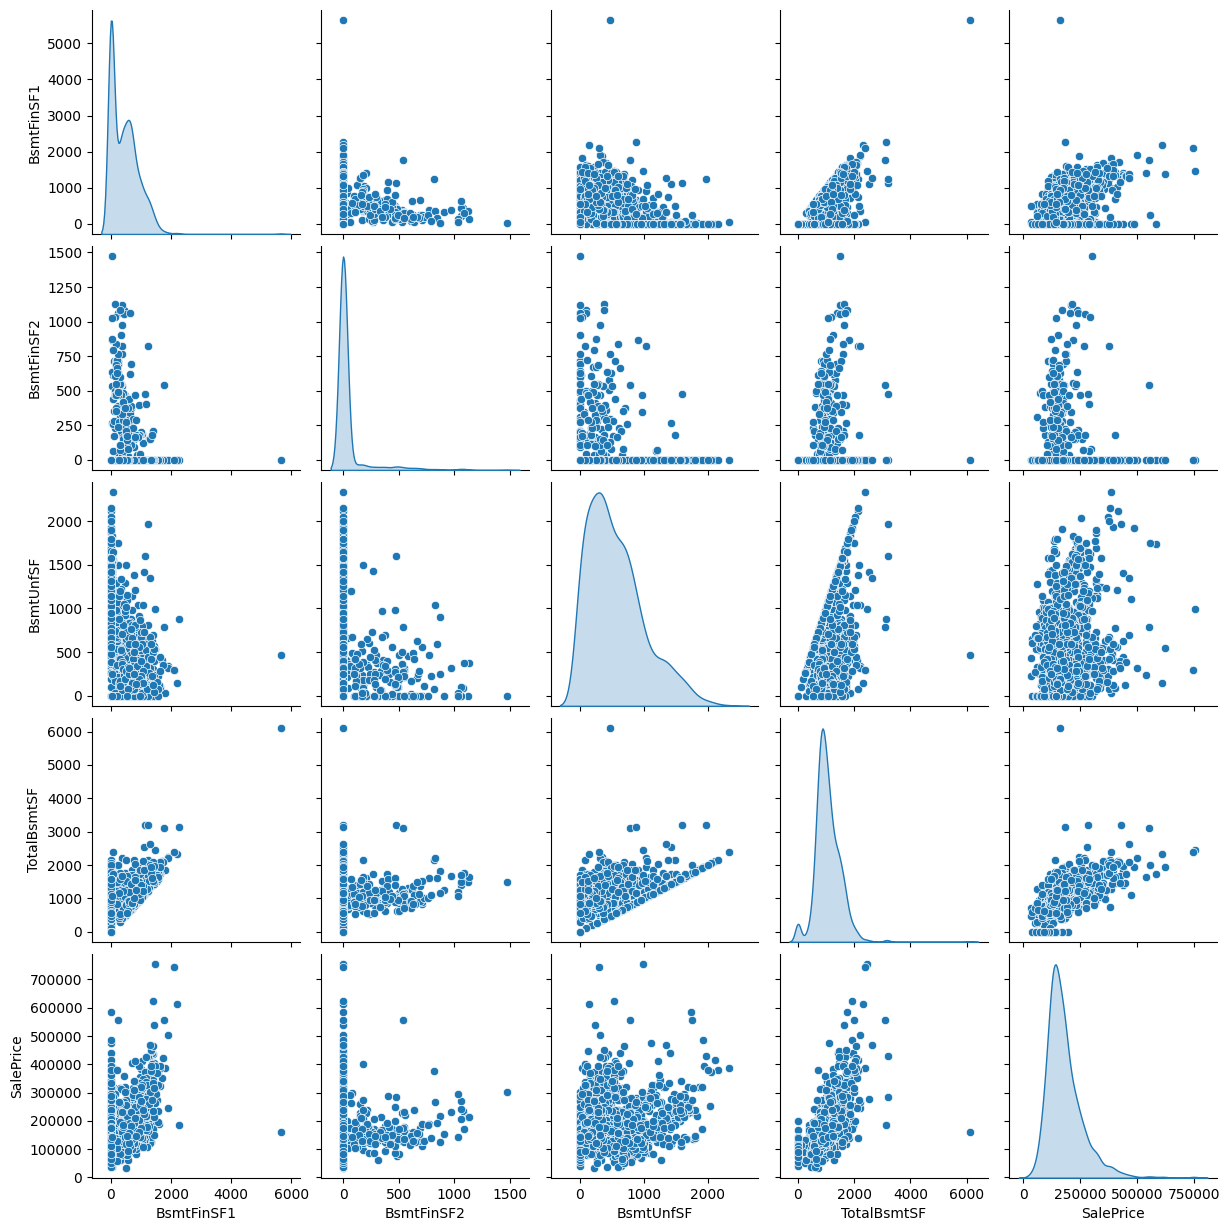

In [14]:
numeric_cols = [ 'BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF','SalePrice']
sns.pairplot(housing_df[numeric_cols],diag_kind='kde')
plt.show()

Let us also plot a heatmap for to see the correlations of independent variables with the 
target variable `SalePrice`

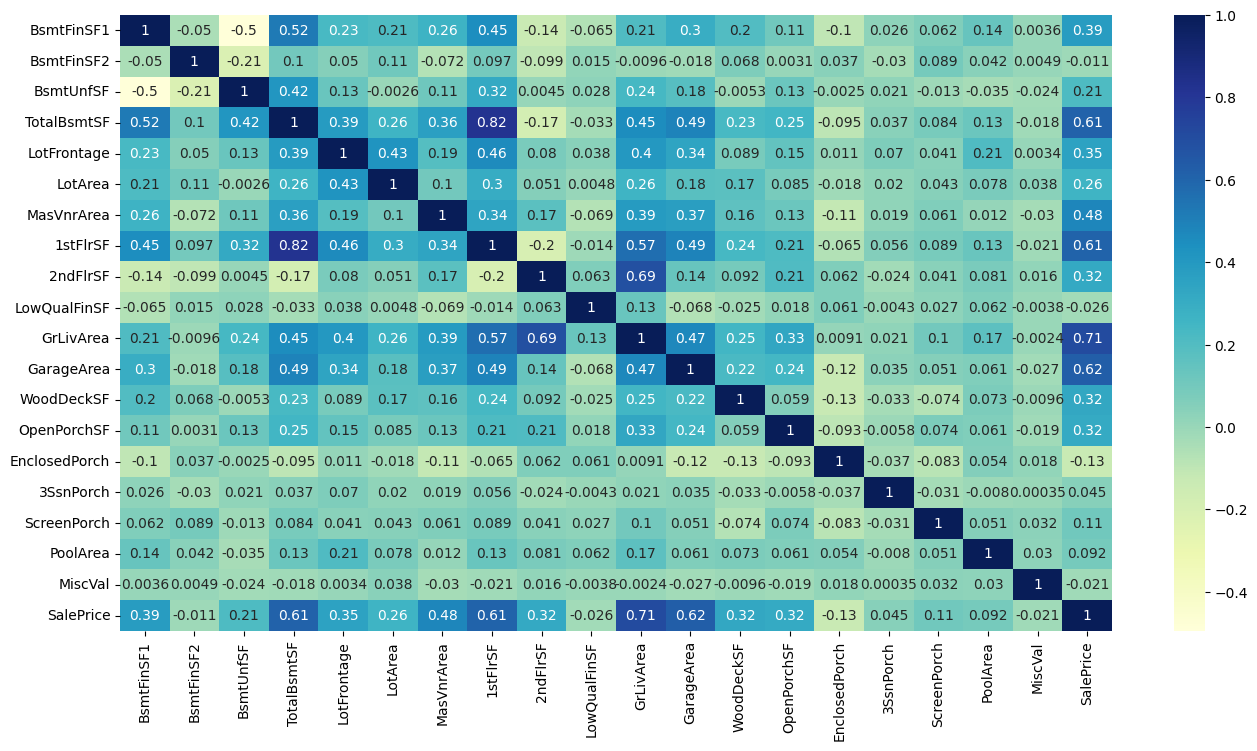

In [15]:
correlation_df = housing_df[['BsmtFinSF1', 'BsmtFinSF2', 
                'BsmtUnfSF', 'TotalBsmtSF','LotFrontage', 'LotArea', 'MasVnrArea','1stFlrSF', '2ndFlrSF', 
                'LowQualFinSF', 'GrLivArea','GarageArea', 'WoodDeckSF','OpenPorchSF', 'EnclosedPorch', 
                '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
                'SalePrice']]

corr= correlation_df.corr()
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(corr, cmap="YlGnBu", annot=True)
plt.show()

#### Conclusions from the above data visualisations:

1. There is a strong positive linear relationship between Target Variable `SalePrice` and the predictors  `GarageArea`, `GrLivArea` , ,`1stFlrSF`,`TotalBsmtSF` and also weak or moderate relation other predictors like `MasVnrArea`,`BsmtFinSF1`,`WoodDeckSF`,`OpenPorchSF`,`2ndFlrSF` etc.

2. Apart from that we could also see multicollinearity present among the many independent variables like `TotalBsmtSF`,`GrLivArea`,`1stFlrSF` etc.




#### Visualising Categorical Variables

As we might have noticed, there are lot more categorical variables compared to numeric variables. Let's make a boxplot for some of these variables.

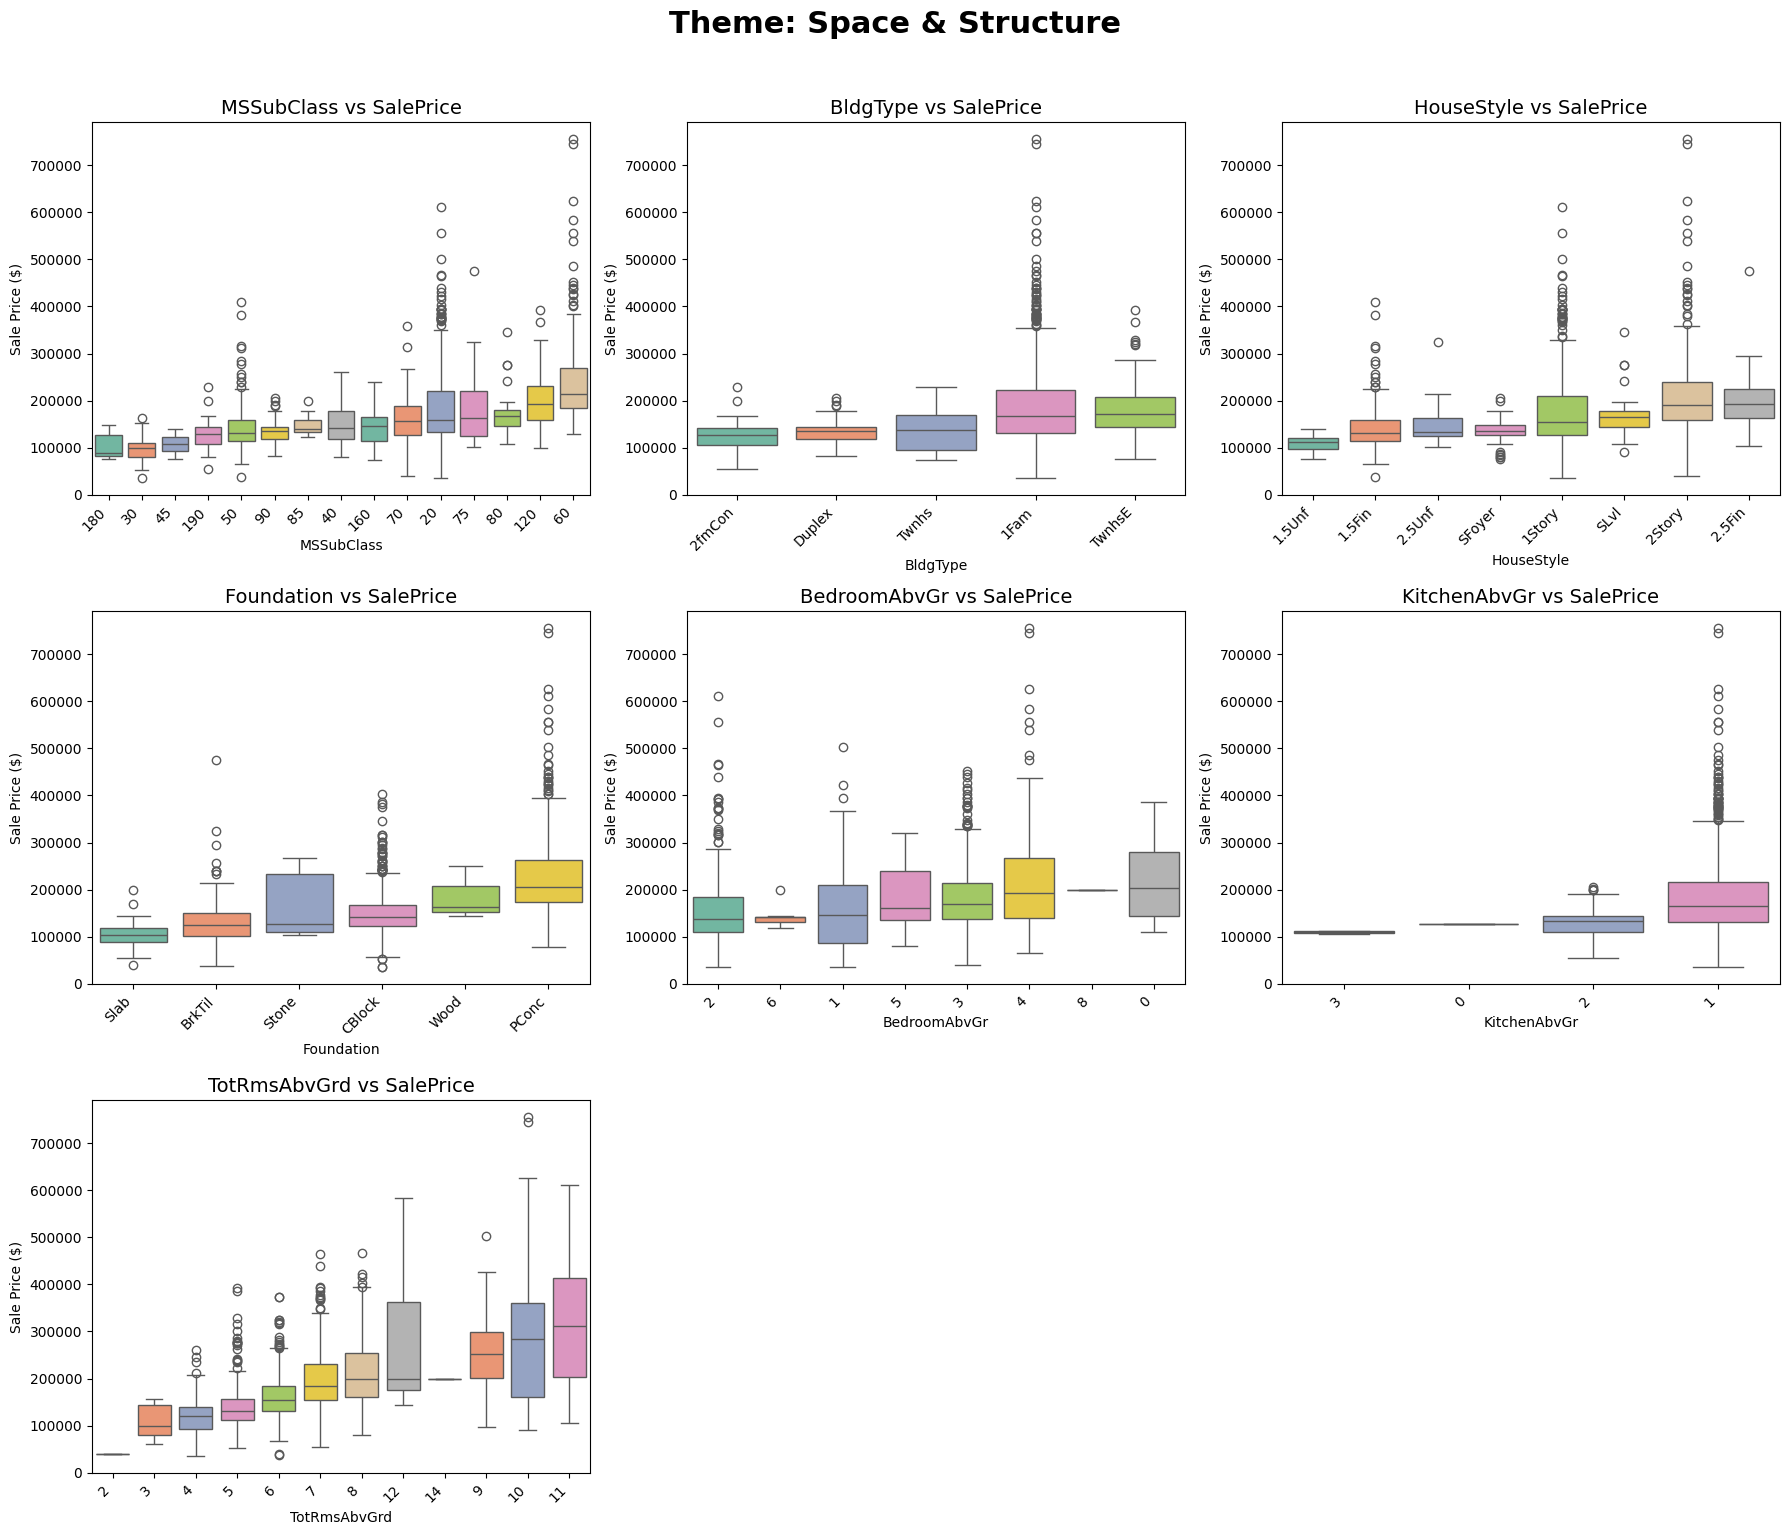

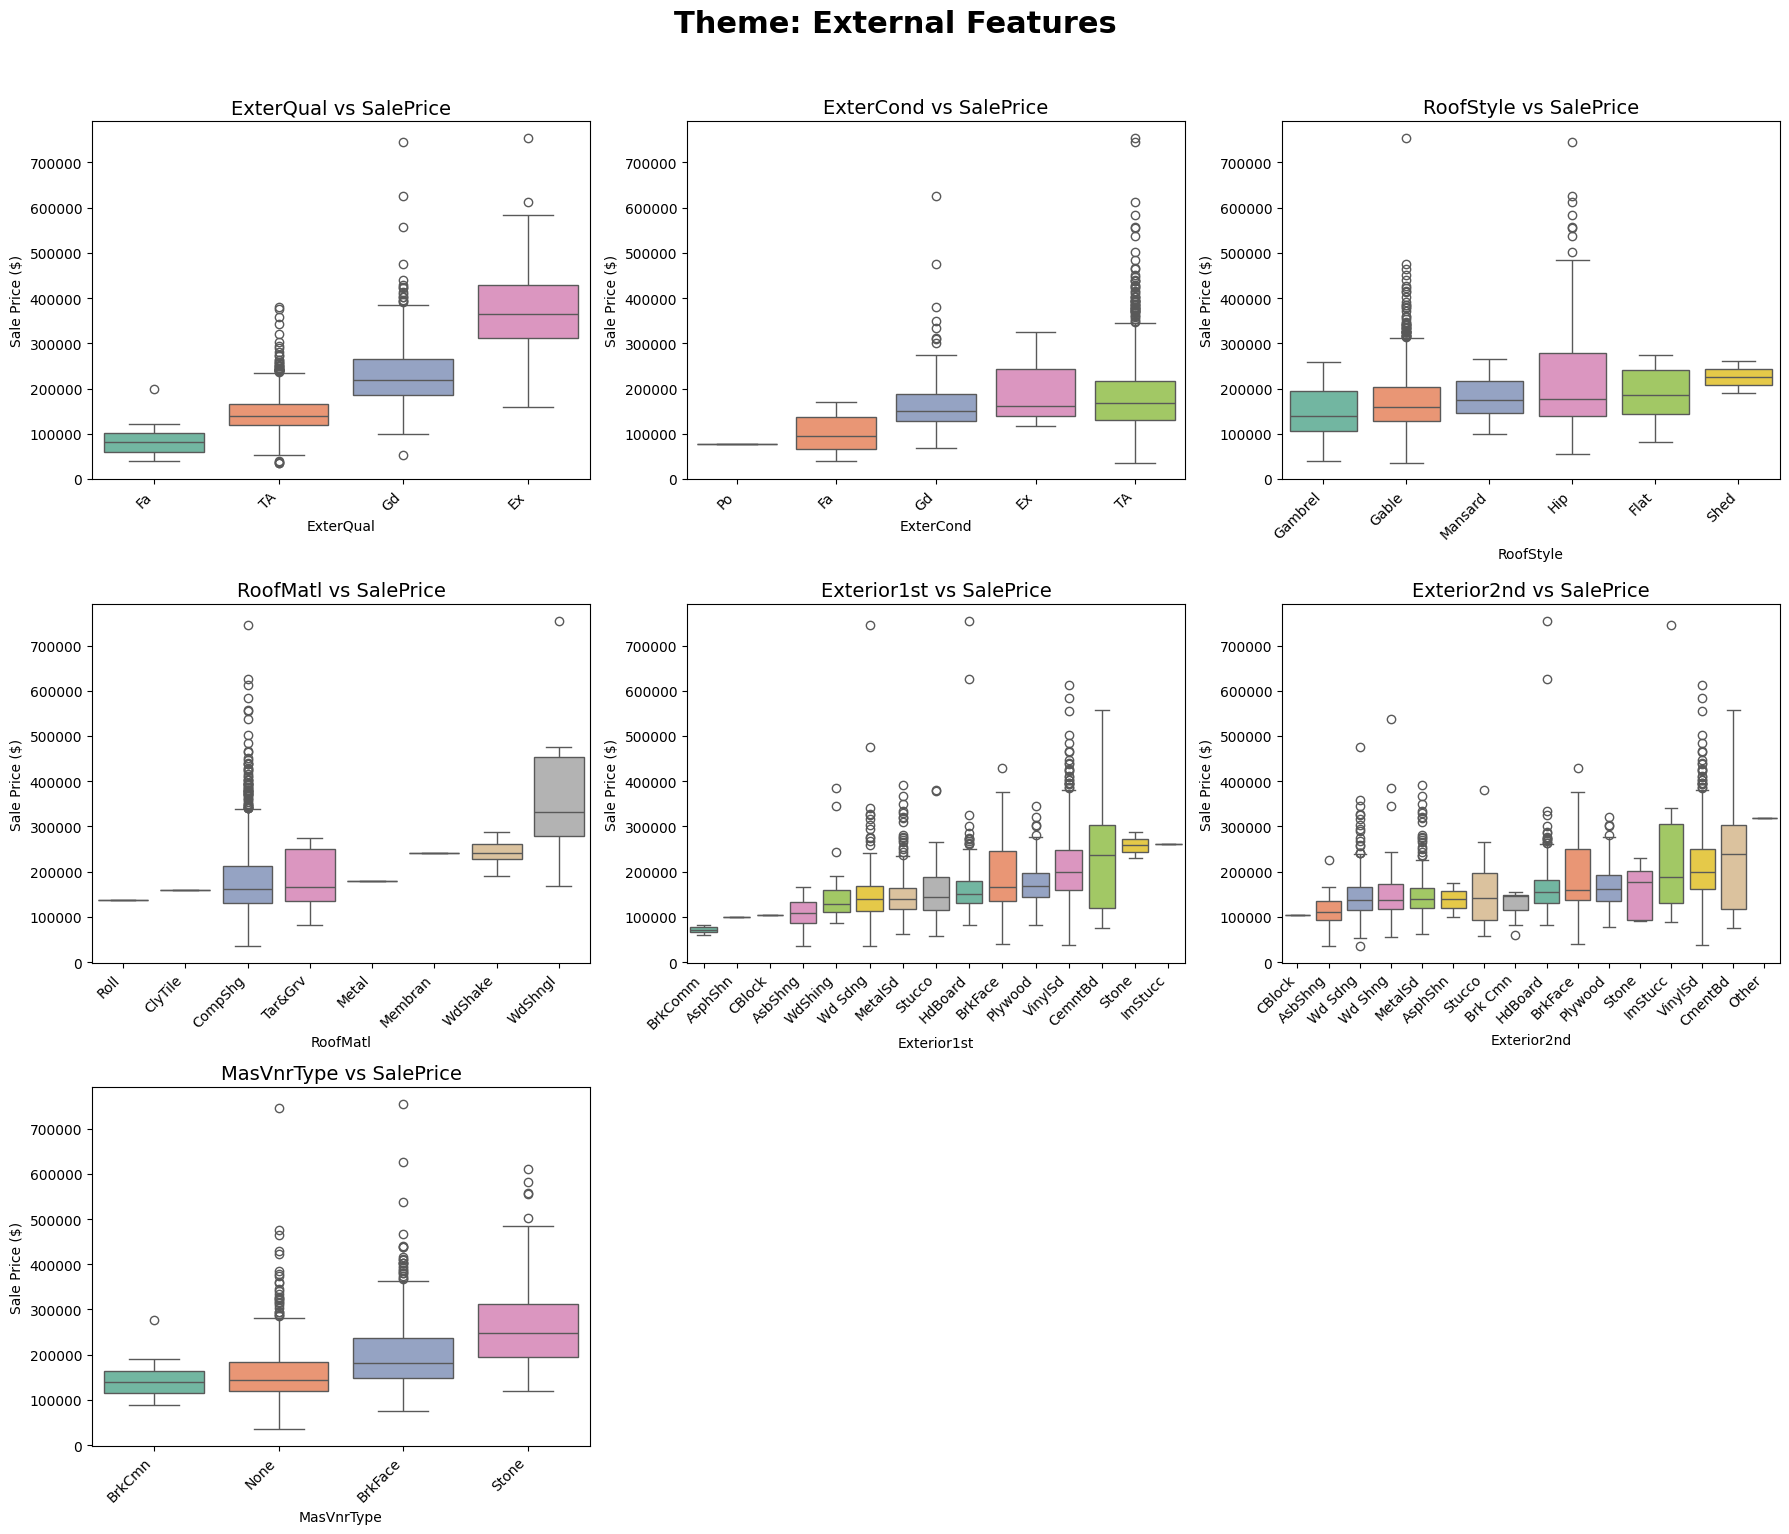

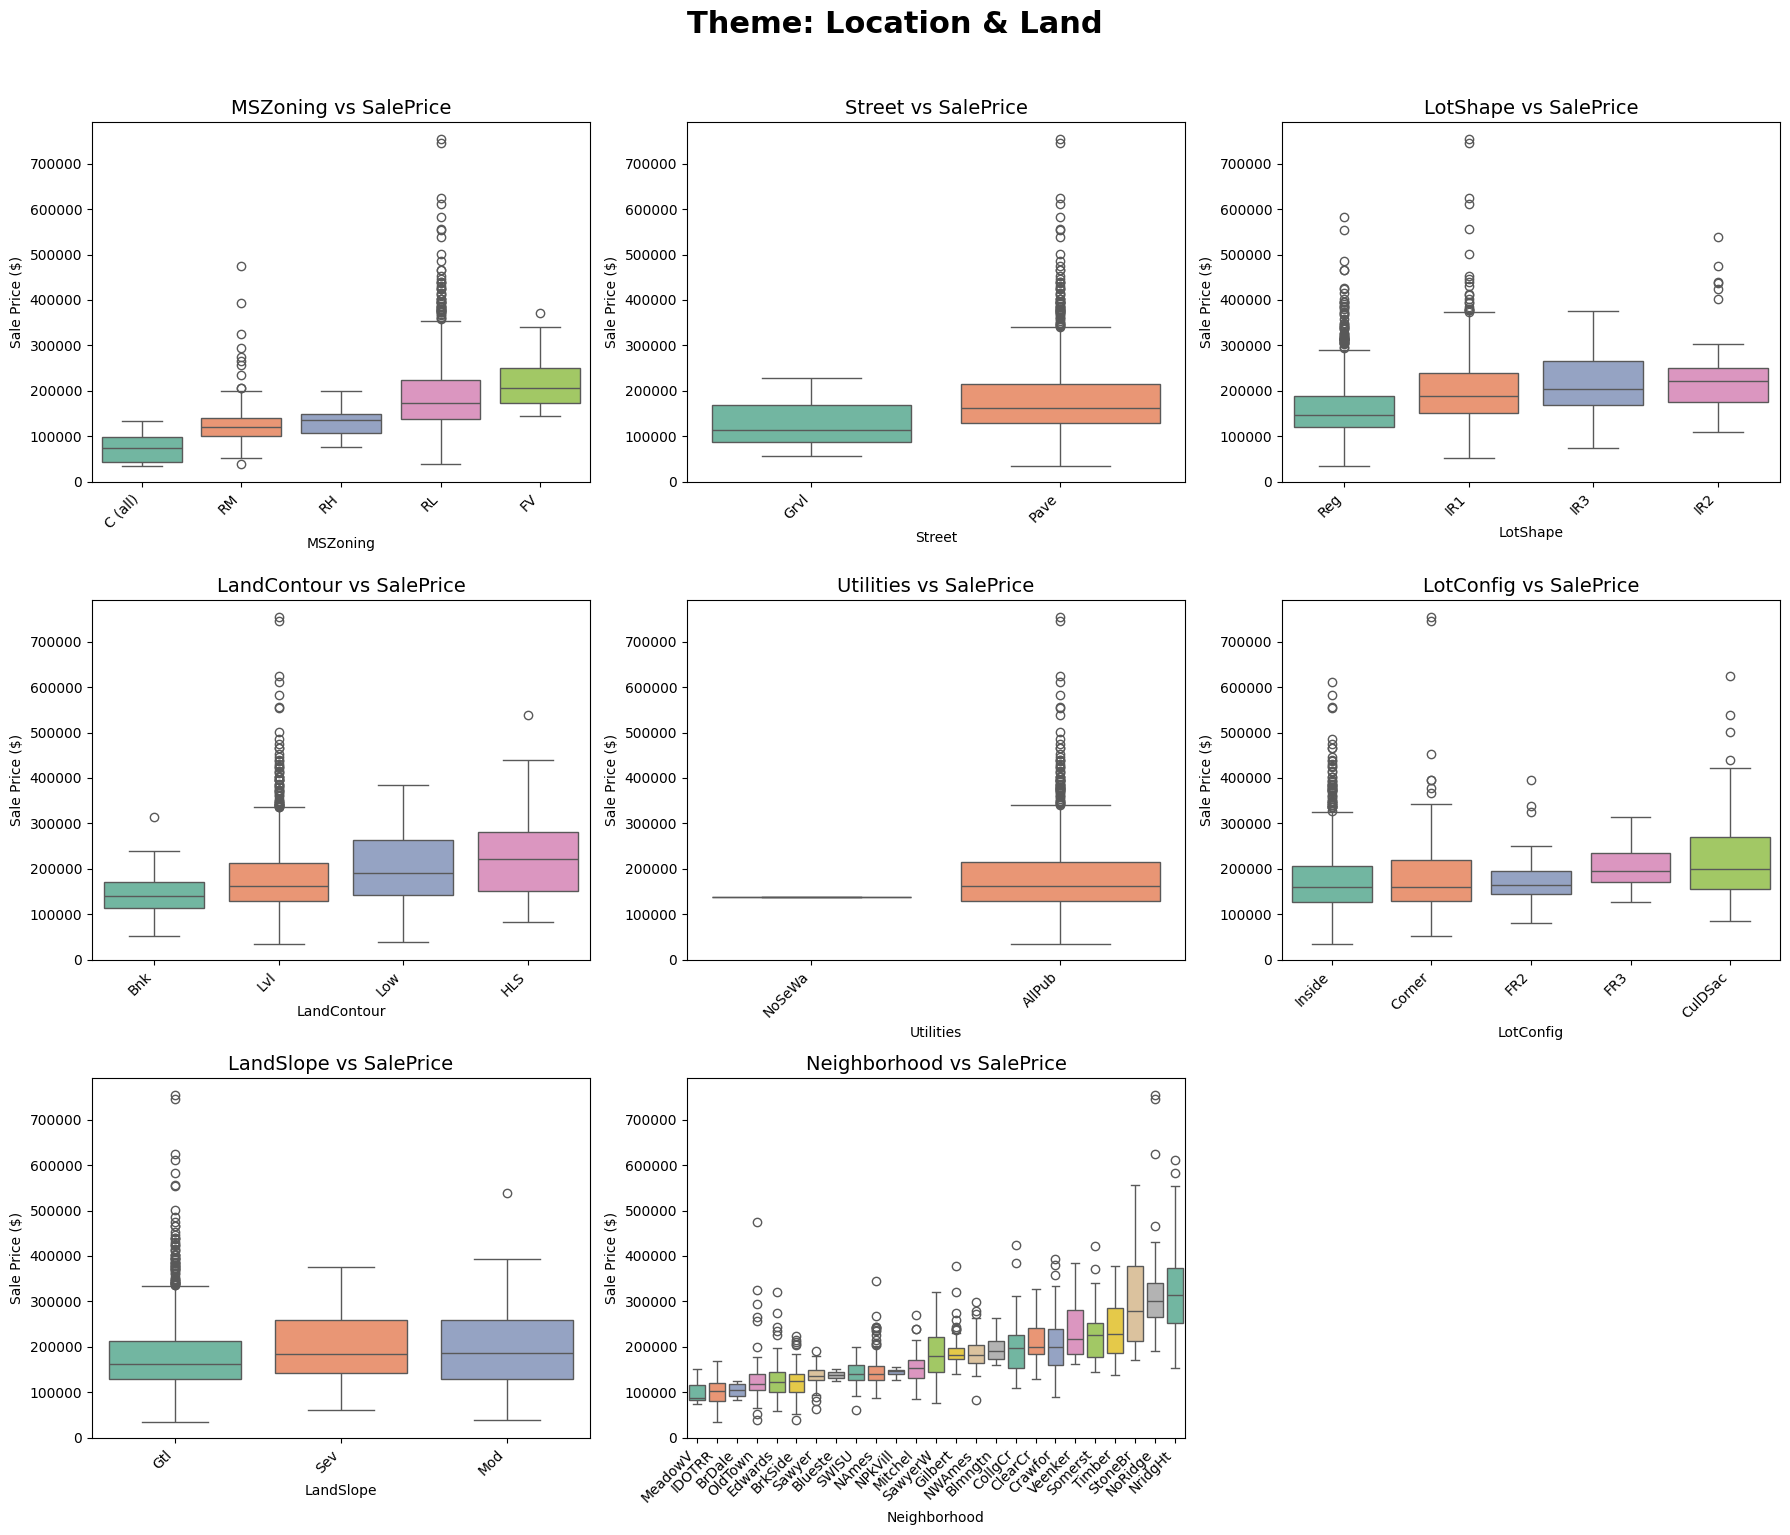

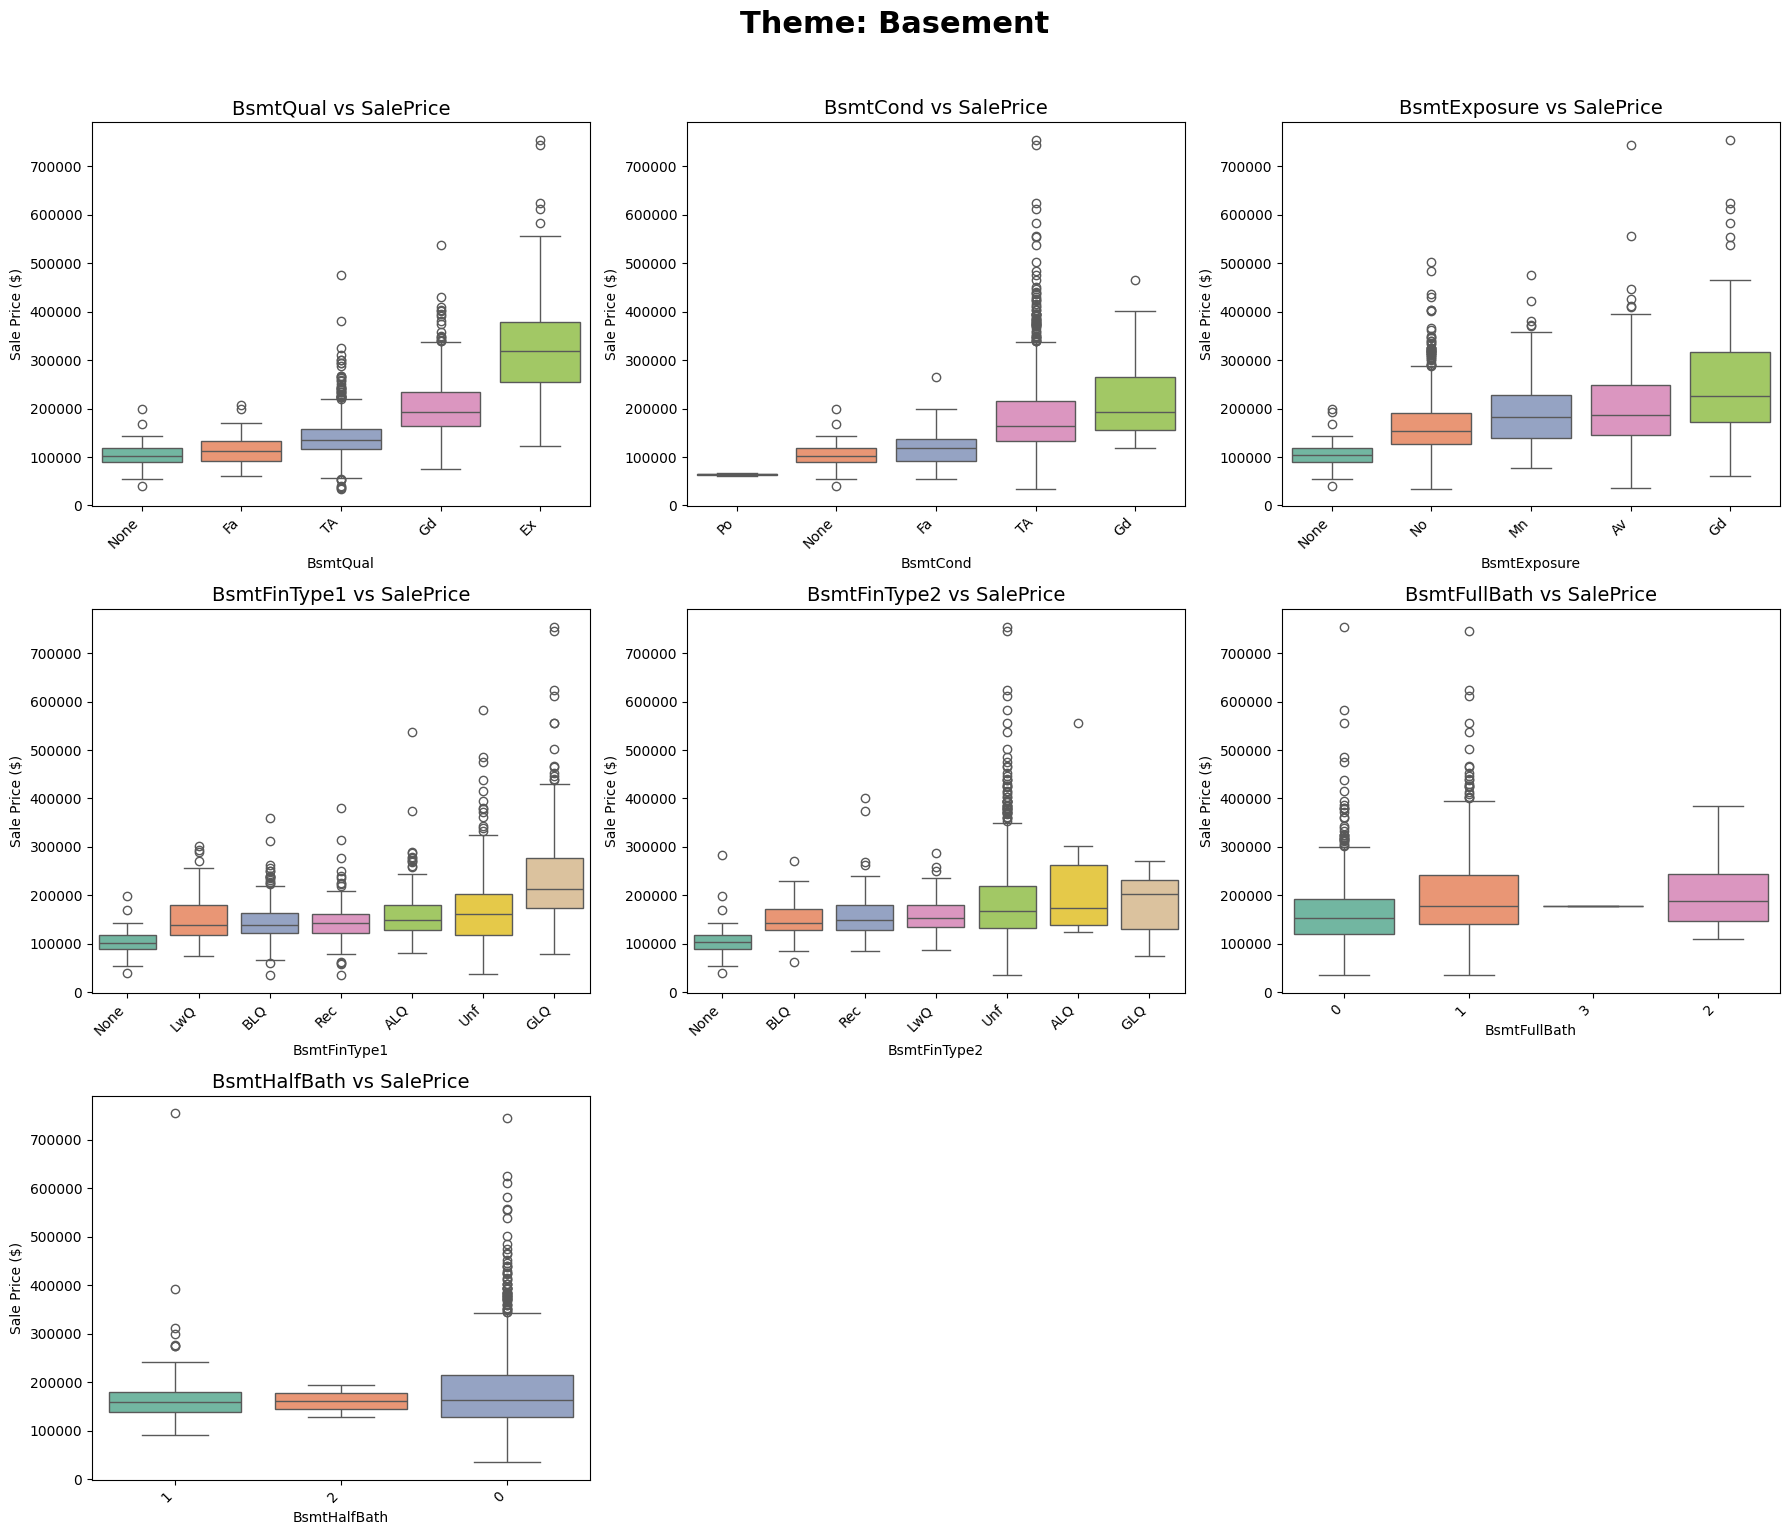

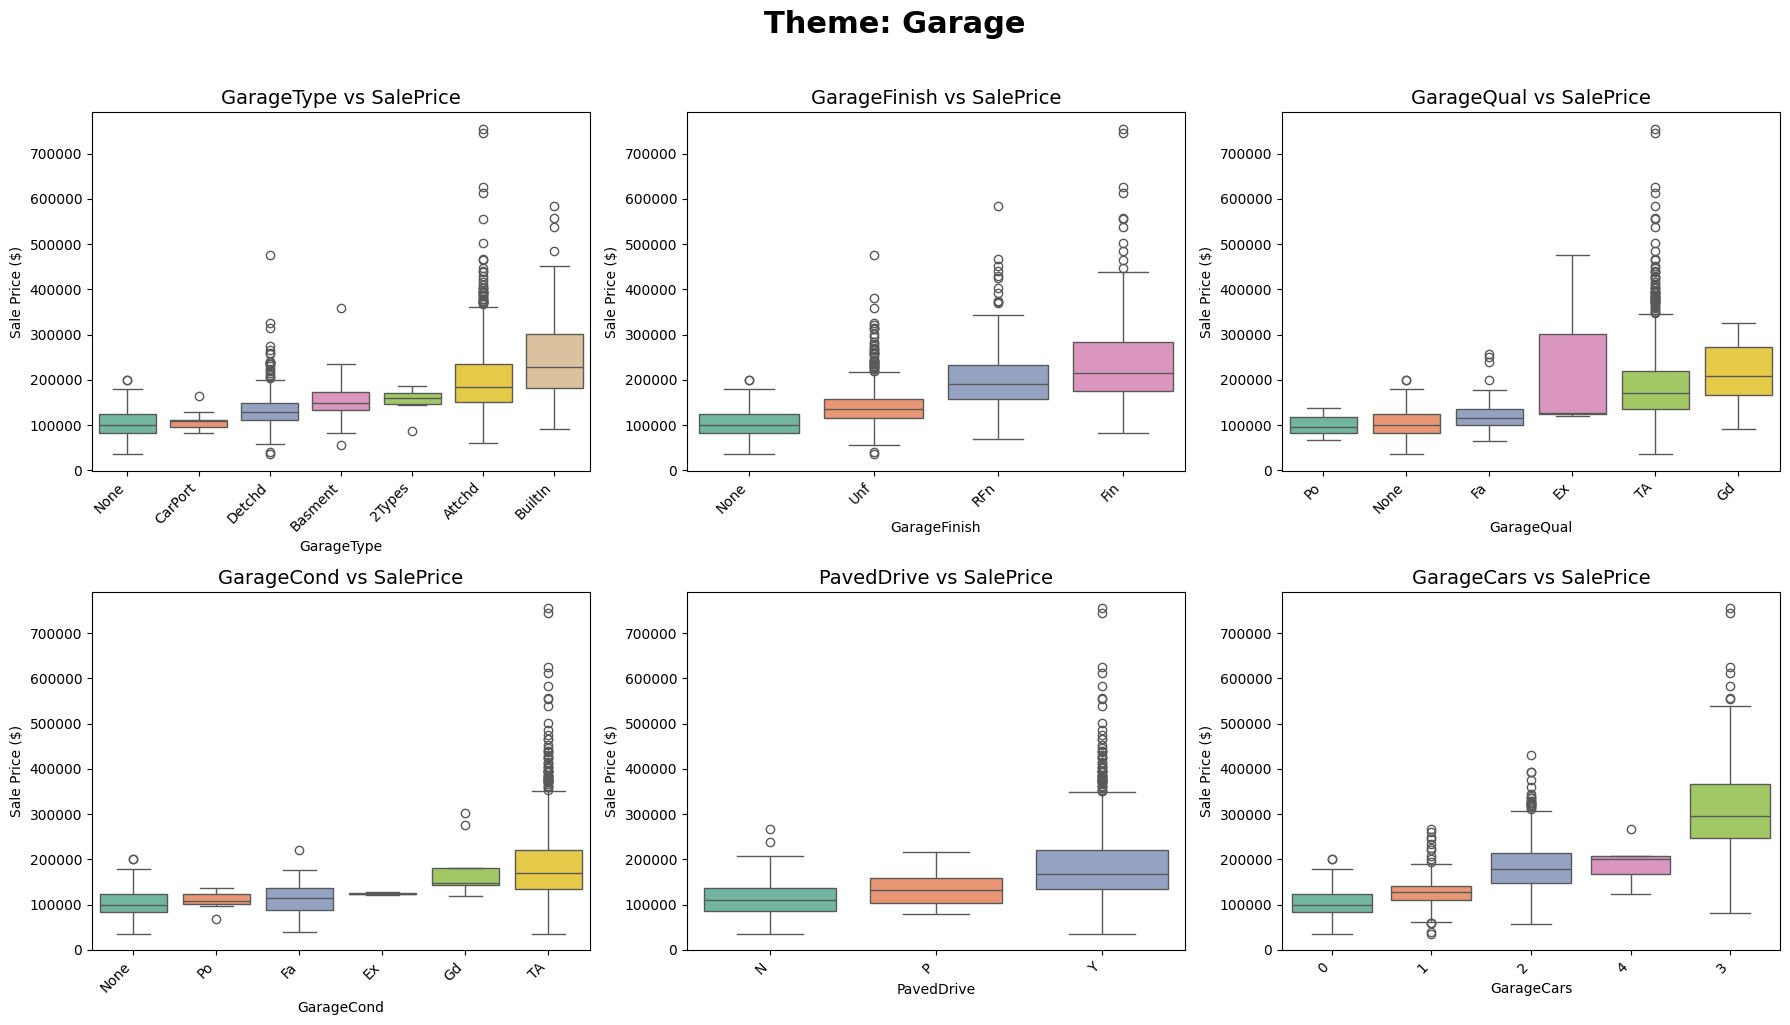

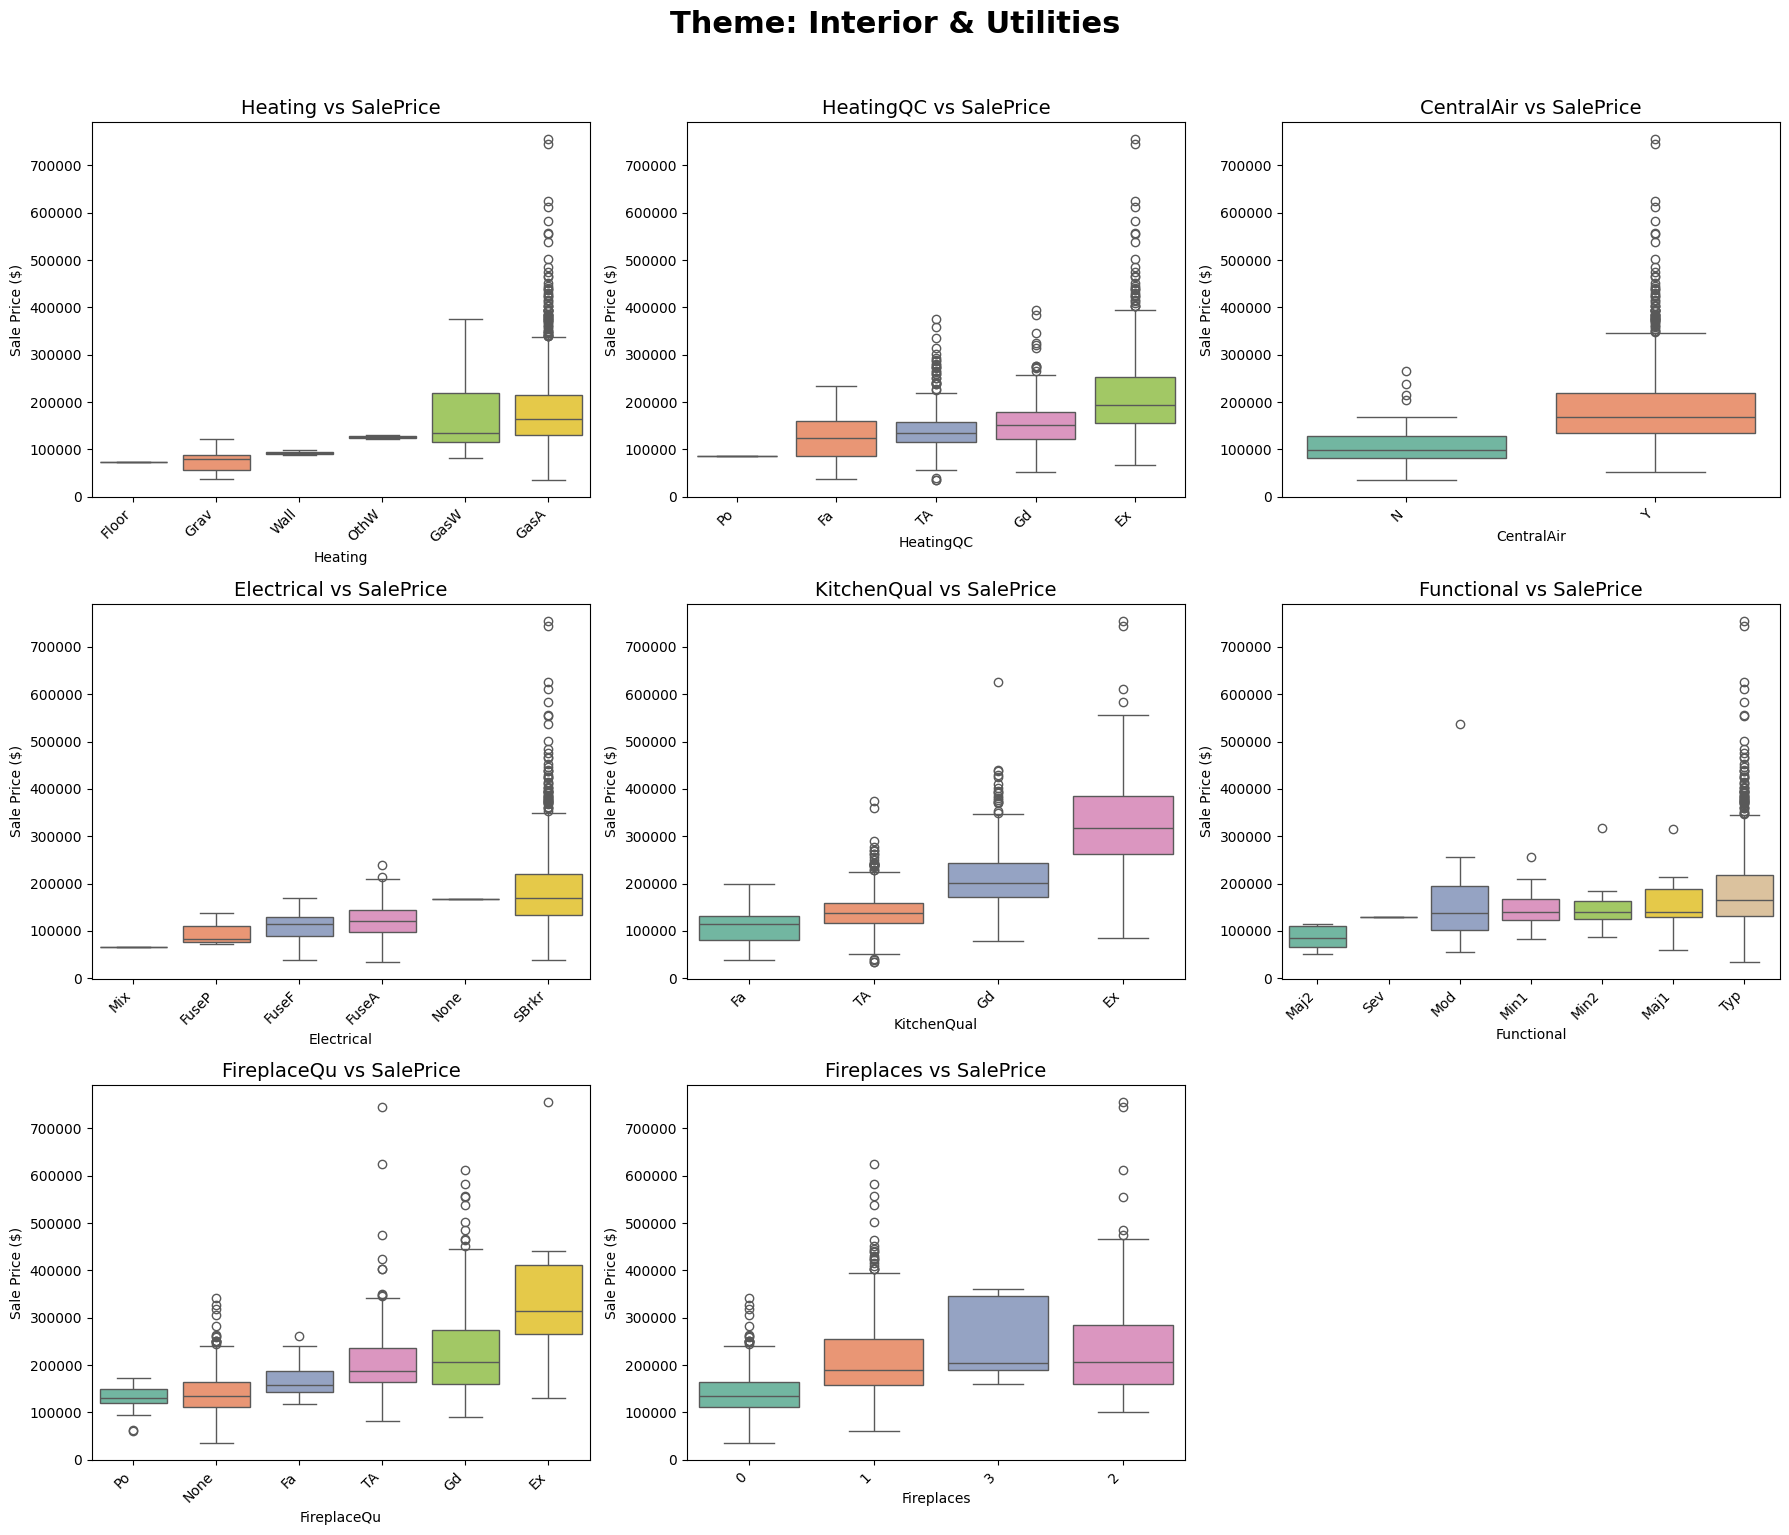

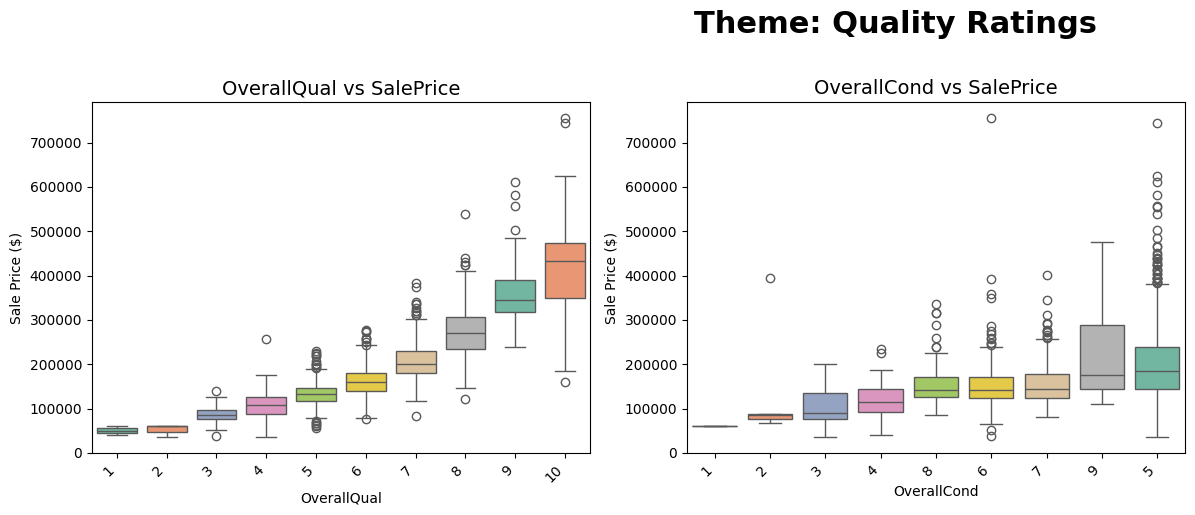

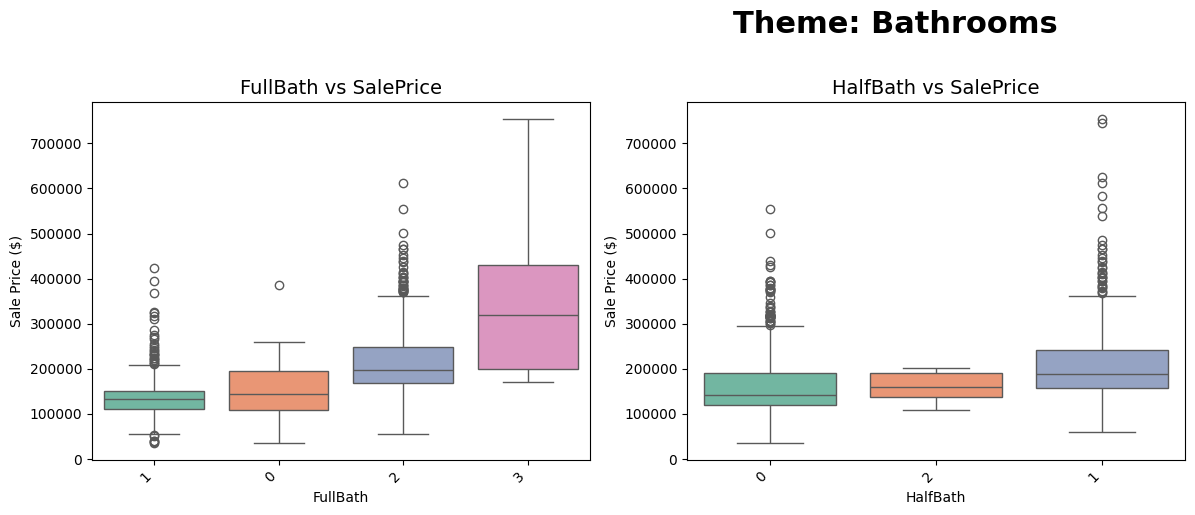

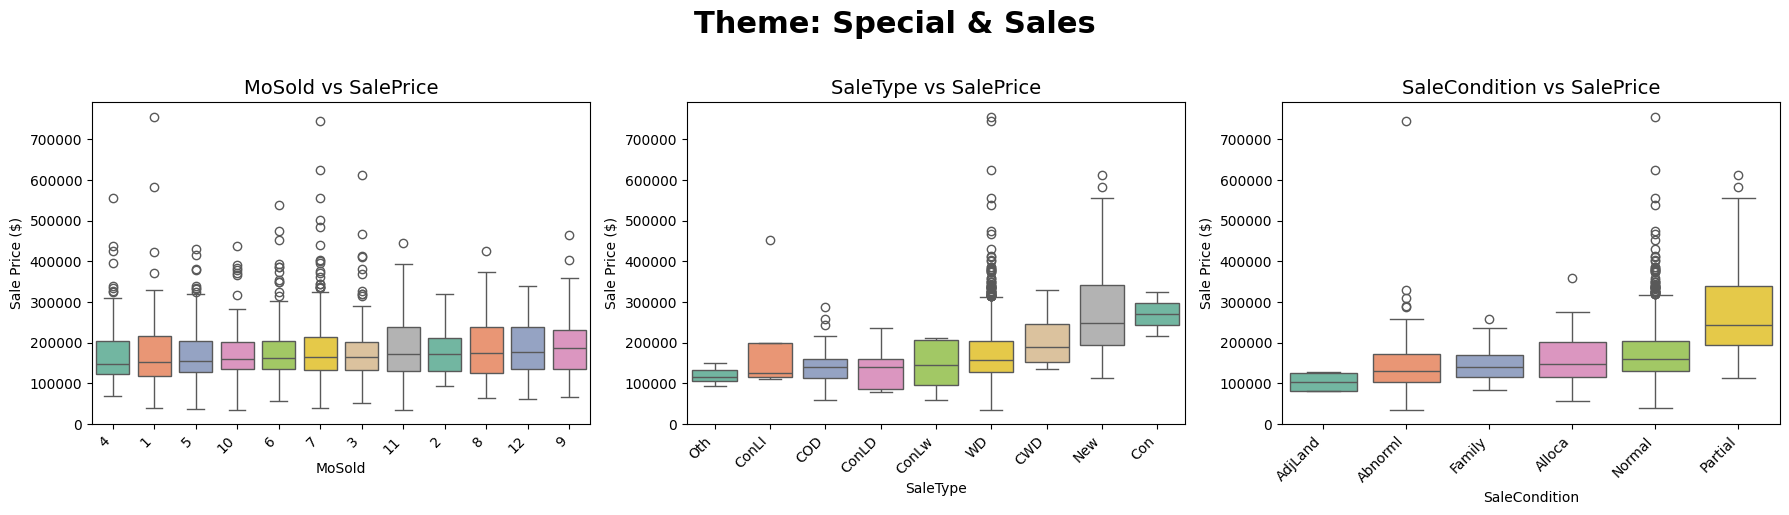

In [16]:

import math

# 1. Define the Dictionary of Themes
themes = {
    "Space & Structure": ['MSSubClass', 'BldgType', 'HouseStyle', 'Foundation','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd'],
    "External Features": ['ExterQual', 'ExterCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType'],
    "Location & Land": ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood'],
    "Basement": ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtFullBath', 'BsmtHalfBath'],
    "Garage": ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','GarageCars'],
    "Interior & Utilities": ['Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',"Fireplaces"],
    "Quality Ratings": ['OverallQual', 'OverallCond'],
    "Bathrooms":["FullBath", "HalfBath"],
    "Special & Sales": [ 'MoSold', 'SaleType', 'SaleCondition']
    
}


# 2. Plotting Function
def plot_themed_grid(theme_name, vars_list, df):
    # Calculate grid size (3 columns)
    n_vars = len(vars_list)
    n_cols = 3
    n_rows = math.ceil(n_vars / n_cols)
    
    plt.figure(figsize=(18, 5 * n_rows))
    plt.suptitle(f'Theme: {theme_name}', fontsize=22, fontweight='bold', y=1.02)
    
    for i, var in enumerate(vars_list):
        plt.subplot(n_rows, n_cols, i + 1)
        
        # Sort by median price for better visualization
        # We fillna with 'None' so the missing categories show up in the plot
        temp_series = df[var].fillna('None')
        order = df.groupby(temp_series)['SalePrice'].median().sort_values().index
        
        sns.boxplot(x=temp_series, y=df['SalePrice'], order=order, palette='Set2')
        
        plt.title(f'{var} vs SalePrice', fontsize=14)
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Sale Price ($)')
        plt.xlabel(var)
        
    plt.tight_layout()
    plt.show()

# 3. Execute for all themes
for theme_name, vars_list in themes.items():
    plot_themed_grid(theme_name, vars_list, housing_df)

## From the above plots following are the analysis:
1. OverallQual & ExterQual:Looks to be the strongest predictors.
2. Neighborhood: Shows massive variations.
3. KitchenQual & BsmtQual:Strong Predictors.

## Step 3: Data Cleanup

#### Dropping the column `Id` which is just an index



In [17]:
housing_df = housing_df.drop(columns=['Id'])

In [18]:
housing_df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Studying the categorical columns with high null values

In [19]:
# Select only categorical columns
cat_cols = housing_df.select_dtypes(include=['object', 'category'])

# Calculate missing values
missing_stats = pd.DataFrame({
    'Total Missing': cat_cols.isnull().sum(),
    'Percentage': (cat_cols.isnull().mean() * 100).round(2)
})
#Sort by Percentage (Descending)
sorted_report = missing_stats.sort_values(by='Percentage', ascending=False)

# 4. Display columns with at least one missing value
print(sorted_report)
# Dropping the Columns based on high percentage of missing values
housing_df = housing_df.drop(columns=['Alley','MiscFeature','PoolQC'])

               Total Missing  Percentage
PoolQC                  1453       99.52
MiscFeature             1406       96.30
Alley                   1369       93.77
Fence                   1179       80.75
MasVnrType               872       59.73
FireplaceQu              690       47.26
GarageType                81        5.55
GarageCond                81        5.55
GarageQual                81        5.55
GarageFinish              81        5.55
BsmtFinType2              38        2.60
BsmtExposure              38        2.60
BsmtFinType1              37        2.53
BsmtQual                  37        2.53
BsmtCond                  37        2.53
Electrical                 1        0.07
KitchenQual                0        0.00
CentralAir                 0        0.00
Functional                 0        0.00
HeatingQC                  0        0.00
Heating                    0        0.00
PavedDrive                 0        0.00
SaleType                   0        0.00
MSZoning        

### Cat columns with more than 95% of records which have same values

In [20]:
#  Identify categorical columns
cat_cols = housing_df.select_dtypes(include=['object', 'category']).columns

# Filter columns where the top value frequency is >= 95%
cols_to_drop = []

for col in cat_cols:
    # Get the frequency of the most common value
    most_freq_value_count = housing_df[col].value_counts(dropna=False).iloc[0]
    
    # Calculate the percentage
    most_freq_pct = most_freq_value_count / len(housing_df)
    
    if most_freq_pct >= 0.95:
        cols_to_drop.append(col)

print(f"Columns with >95% same values: {cols_to_drop}")

# Dropping these columns as these may not contribute significantly to the prediction
housing_df = housing_df.drop(columns=cols_to_drop)


Columns with >95% same values: ['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating']


### Studying the same behaviour for the numeric columns as above.

In [21]:
# Select only number columns which may also include categorical columns 
cat_cols = housing_df.select_dtypes(include=['number'])

# Calculate missing values
missing_stats = pd.DataFrame({
    'Total Missing': cat_cols.isnull().sum(),
    'Percentage': (cat_cols.isnull().mean() * 100).round(2)
})
#Sort by Percentage (Descending)
sorted_report = missing_stats.sort_values(by='Percentage', ascending=False)

# 4. Display columns with at least one missing value
print(sorted_report)
# Dropping the Columns based on high percentage of missing values

cols_to_drop = []

for col in cat_cols:
    # Get the frequency of the most common value
    most_freq_value_count = housing_df[col].value_counts(dropna=False).iloc[0]
    
    # Calculate the percentage
    most_freq_pct = most_freq_value_count / len(housing_df)
    
    if most_freq_pct >= 0.95:
        cols_to_drop.append(col)

print(f"Columns with >95% same values: {cols_to_drop}")
# Dropping these columns as these are Near-Zero Variance predictors and may not contribute significantly to the prediction
housing_df = housing_df.drop(columns=cols_to_drop)

               Total Missing  Percentage
LotFrontage              259       17.74
GarageYrBlt               81        5.55
MasVnrArea                 8        0.55
OpenPorchSF                0        0.00
KitchenAbvGr               0        0.00
TotRmsAbvGrd               0        0.00
Fireplaces                 0        0.00
GarageCars                 0        0.00
GarageArea                 0        0.00
WoodDeckSF                 0        0.00
MSSubClass                 0        0.00
BedroomAbvGr               0        0.00
3SsnPorch                  0        0.00
ScreenPorch                0        0.00
PoolArea                   0        0.00
MiscVal                    0        0.00
MoSold                     0        0.00
YrSold                     0        0.00
EnclosedPorch              0        0.00
FullBath                   0        0.00
HalfBath                   0        0.00
BsmtFinSF2                 0        0.00
LotArea                    0        0.00
OverallQual     

#### Studying the anamolies in the columns MasVnrType and MasVnrArea

In [22]:
# Handle cases where both are missing
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna('None')
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(0)

# Fix Inconsistent records i.e (Area > 0 but Type is 'None')
# We replace 'None' with the most frequent actual material
frequent_type = housing_df[housing_df['MasVnrType'] != 'None']['MasVnrType'].mode()[0]
housing_df.loc[(housing_df['MasVnrType'] == 'None') & (housing_df['MasVnrArea'] > 0), 'MasVnrType'] = frequent_type

# Fix Invisible Veneers (Type is material but Area is 0)
# We replace 0 with the median area for that specific type
median_area = housing_df[housing_df['MasVnrArea'] > 0]['MasVnrArea'].median()
housing_df.loc[(housing_df['MasVnrType'] != 'None') & (housing_df['MasVnrArea'] == 0), 'MasVnrArea'] = median_area

In [23]:
remaining = housing_df[(housing_df['MasVnrType'] == 'None') & (housing_df['MasVnrArea'] > 0)]
print(f"Remaining anomalies: {len(remaining)}")

Remaining anomalies: 0


In [24]:
#  Garage Area exists but Type is NaN
ghost_garage = housing_df[(housing_df['GarageArea'] > 0) & (housing_df['GarageType'].isna())]

#  Type exists but Area is 0
invisible_garage = housing_df[(housing_df['GarageType'].notna()) & (housing_df['GarageType'] != 'None') & (housing_df['GarageArea'] == 0)]

print(f"Ghost Garages: {len(ghost_garage)} | Invisible Garages: {len(invisible_garage)}")


#  If Area is 0, set Type to 'None' (and other related cats)
garage_cats = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for cat in garage_cats:
    housing_df.loc[housing_df['GarageArea'] == 0, cat] = 'None'

# If Area > 0 but Type is NaN, fill with Mode
for cat in garage_cats:
    mode_val = housing_df[housing_df['GarageArea'] > 0][cat].mode()[0]
    housing_df.loc[(housing_df['GarageArea'] > 0) & (housing_df[cat].isna()), cat] = mode_val

Ghost Garages: 0 | Invisible Garages: 0


In [25]:

#  Basement: Total Area > 0 but Quality/Condition is NaN
ghost_bsmt = housing_df[(housing_df['TotalBsmtSF'] > 0) & (housing_df['BsmtQual'].isna())]

#  Basement: Qual/Cond exists but Total Area is 0
invisible_bsmt = housing_df[(housing_df['BsmtQual'].notna()) & (housing_df['BsmtQual'] != 'None') & (housing_df['TotalBsmtSF'] == 0)]

print(f"Ghost Basements: {len(ghost_bsmt)} | Invisible Basements: {len(invisible_bsmt)}")


bsmt_cats = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

# If TotalBsmtSF is 0, set all Categoricals to 'None'
for cat in bsmt_cats:
    housing_df.loc[housing_df['TotalBsmtSF'] == 0, cat] = 'None'

# If TotalBsmtSF > 0 but Categoricals are NaN, fill with Mode
for cat in bsmt_cats:
    mode_val = housing_df[housing_df['TotalBsmtSF'] > 0][cat].mode()[0]
    housing_df.loc[(housing_df['TotalBsmtSF'] > 0) & (housing_df[cat].isna()), cat] = mode_val

Ghost Basements: 0 | Invisible Basements: 0


In [26]:
# If Fireplaces count is 0, Quality must be 'None'
housing_df.loc[housing_df['Fireplaces'] == 0, 'FireplaceQu'] = 'None'

# If Fireplaces > 0 but Quality is NaN, fill with Mode
if housing_df['Fireplaces'].gt(0).any():
    fp_mode = housing_df[housing_df['Fireplaces'] > 0]['FireplaceQu'].mode()[0]
    housing_df.loc[(housing_df['Fireplaces'] > 0) & (housing_df['FireplaceQu'].isna()), 'FireplaceQu'] = fp_mode

In [27]:
# Check for nulls in Electrical
if housing_df['Electrical'].isnull().any():
    # Standard fix is to fill with the most common system (usually SBrkr)
    elec_mode = housing_df['Electrical'].mode()[0]
    housing_df['Electrical'] = housing_df['Electrical'].fillna(elec_mode)

Converting the years based columns to calculate the age of Blding

In [28]:
housing_df['HouseAge'] = housing_df['YrSold'] - housing_df['YearBuilt']
housing_df['RemodAge'] = housing_df['YrSold'] - housing_df['YearRemodAdd']

In [29]:
# Handle Numerical Missing Values
# LotFrontage: Fill with median of the neighborhood or general median

housing_df['LotFrontage'] = housing_df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)


In [30]:
# Treat MSSubClass as string instead of numeric for better interpretation
# MSSubClass is categorical, even though it's numeric in the CSV
housing_df['MSSubClass'] = housing_df['MSSubClass'].astype(str)

## Step 4: Data Preparation

In [31]:
# Following are the list of all categorical variables including many numerical variables as well which are discrete in nature
cat_variables = ['MSSubClass', 'BldgType', 'HouseStyle', 'Foundation','BedroomAbvGr', 'TotRmsAbvGrd',
                'ExterQual', 'ExterCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
                 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','BsmtFullBath', 'BsmtHalfBath',
                 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive','GarageCars',
                  'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',"Fireplaces",
                 'OverallQual', 'OverallCond',"FullBath", "HalfBath",'SaleType', 'SaleCondition','MoSold', 'Condition1', 'Fence']

In [32]:
X = housing_df.drop('SalePrice', axis=1)
y=housing_df["SalePrice"]


### Dummy Variables

In [33]:
X_encoded = pd.get_dummies(housing_df[cat_variables], drop_first=True)

X = pd.concat([X, X_encoded], axis=1)
X = X.drop(list(cat_variables), axis=1,errors='ignore')
X.head(10)
print()

In [34]:
 
print(X.select_dtypes(include=['int64', 'float64']).columns)

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'HouseAge',
       'RemodAge'],
      dtype='object')


##### We need to drop the year based columns i.e. YrSold,YearBuilt,YearRemodAdd as we have derived the 
##### new variables out of these variables

In [35]:
X = X.drop(columns=['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'], axis=1,errors='ignore')
print(X.select_dtypes(include=['int64', 'float64']).columns)


Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'HouseAge', 'RemodAge'],
      dtype='object')


## Step 4: Splitting the Data into Training and Testing Sets

the first basic step for regression is performing a train-test split.

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
#y = np.log1p(housing_df['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Scaling the data which is mandatory for Regularisation to perform.

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Step 5: Building a linear model



In [38]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

128197.60134370235
[-6.04041075e+04  1.18061807e+05  1.88094958e+04 -5.14331227e+03
  8.32858101e+02  1.42153591e+03 -4.00663073e+03  1.23029878e+05
  1.17880502e+05  1.34568807e+05  3.61776482e+04  1.32176805e+04
 -4.41482480e+03  2.29613736e+03  9.66192278e+03 -2.08087540e+04
 -1.19423955e+04  4.75377235e+03  4.67231576e+03 -1.13191939e+03
  1.94457777e+04  1.67646787e+04  1.51198124e+04  7.11966252e+03
  2.56679659e+04  1.17362095e+04  2.33889915e+04  2.75424098e+04
  2.37354357e+04  1.46348341e+04 -1.25148512e+03 -1.13191939e+03
 -1.25148512e+03 -1.98409502e+04 -1.41617725e+04  4.18568643e+04
  2.47283889e+04 -2.23712268e+04 -1.52821887e+04 -4.75334554e+03
  1.81756944e+04  1.79298148e+03  7.25428578e+03  3.73092068e+03
 -3.83208520e+03  1.41777782e+04  4.25638970e+03 -6.16637598e+03
 -7.79355085e+03 -1.46772950e+04 -5.01222993e+04 -5.71816692e+04
  2.91038305e-11 -5.51108584e+04 -4.26108415e+03 -2.69080096e+04
 -3.69673482e+03  1.23167799e+03  3.23793146e+03  3.13061925e+03
 -1.32

In [40]:
y_pred_train = lm.predict(X_train_scaled)
y_pred_test = lm.predict(X_test_scaled)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8910599058121391
0.836612664416464
695113928199.403
460541930109.86584
680816775.9053898
1051465593.8581412


**Althought R2 Score for Train and Test Set have acceptable difference ( may be we need more data clean up) but there are huge number of variables for the linear regression to handle, we will also try to using Ridge and Lasso Regression Analysis below**

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

In [41]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scaled, y_train)  
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,5.0


In [42]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 5.0}


In [43]:

alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scaled, y_train)
print(ridge.coef_)

[ -5302.08499552  25449.90446584  24802.80576406  17960.32009719
   8308.17713176  17452.54982907  25267.34142741  54470.88909024
  74466.85975294  74040.33232884  38452.70601007  16095.56743862
   4318.79660131   -277.07045063   5828.94059127  -8724.35033237
 -16512.5825904   -5771.77659633  -5886.37604501  -5359.24307916
  11578.40497602    181.27968841   1866.71607448   5154.13557847
   4884.93679979   1059.30488426   8565.16714243   7322.79349114
   2609.17043821   2548.27912458   -795.21613046  -5359.24307916
   -795.21613047 -17384.22321108 -17260.26653631   6337.22860997
   1188.41759449  -1128.31997     -2102.07635643  -3317.34162156
  -4639.5399665   -5263.00403347   1442.59955541   1336.64124321
  -3038.25777944   4976.45830771   2316.74231459 -18445.0474148
  -8988.32106262 -19528.32423461  -6614.29216934  -5381.04599761
      0.          -5083.60014134   -651.49588238  -3160.0093696
   3701.31732741   7857.01989414    972.93491879   1468.69539701
  -3167.77944554  21457.839

In [44]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

metric2 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8754766612309398
0.8415845938340395
794545918190.6184
446527490360.5281
778203641.7146115
1019469156.074265


In [45]:
lasso = Lasso()
folds = 5
model_cv = GridSearchCV(estimator=lasso,
                        param_grid=params,
                        scoring='neg_mean_absolute_error',
                        cv=folds,
                        return_train_score=True,
                        verbose=1)
model_cv.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Lasso()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,100


In [46]:


print(model_cv.best_params_['alpha'])
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
        
lasso.fit(X_train_scaled, y_train)

100


,alpha,100
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [47]:
lasso.coef_

array([-6.02151696e+02,  2.61163052e+04,  1.38828981e+04,  0.00000000e+00,
        0.00000000e+00,  7.36461763e+02,  0.00000000e+00,  0.00000000e+00,
        3.72015088e+04,  2.54266478e+05,  3.37511174e+04,  1.21784897e+04,
       -0.00000000e+00, -0.00000000e+00,  3.82699082e+03, -6.15963836e+03,
       -1.52834221e+04, -9.85399468e+02, -0.00000000e+00, -1.02805243e+04,
        1.16191089e+04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  1.81192689e+03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -4.96941863e+03, -9.55513333e+02,
       -2.44002383e+01, -1.66623129e+04, -1.18838910e+04,  9.98916260e+03,
        4.41554372e+03, -0.00000000e+00, -0.00000000e+00, -7.98335504e+03,
        0.00000000e+00, -0.00000000e+00,  1.07621111e+03,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.51937371e+04,
       -4.43740899e+03, -1.28246885e+04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  

In [48]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

metric3 = []
r2_train_lr = r2_score(y_train, y_train_pred)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8741957138330694
0.8501297369349572
802719257714.4033
422441188428.33496
786208871.4146948
964477599.1514497


In [49]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.910599e-01,8.754767e-01,8.741957e-01
1,R2 Score (Test),8.366127e-01,8.415846e-01,8.501297e-01
2,RSS (Train),6.951139e+11,7.945459e+11,8.027193e+11
3,RSS (Test),4.605419e+11,4.465275e+11,4.224412e+11
4,MSE (Train),2.609247e+04,2.789630e+04,2.803942e+04
5,MSE (Test),3.242631e+04,3.192913e+04,3.105604e+04


## Lets observe the changes in the coefficients after regularization

In [50]:
betas = pd.DataFrame(index=X.columns)

In [51]:
betas.rows = X.columns

In [52]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [53]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
LotFrontage,-6.040411e+04,-5302.084996,-602.151696
LotArea,1.180618e+05,25449.904466,26116.305207
MasVnrArea,1.880950e+04,24802.805764,13882.898132
BsmtFinSF1,-5.143312e+03,17960.320097,0.000000
BsmtFinSF2,8.328581e+02,8308.177132,0.000000
BsmtUnfSF,1.421536e+03,17452.549829,736.461763
TotalBsmtSF,-4.006631e+03,25267.341427,0.000000
1stFlrSF,1.230299e+05,54470.889090,0.000000
2ndFlrSF,1.178805e+05,74466.859753,37201.508829
GrLivArea,1.345688e+05,74040.332329,254266.477939


## Evaluation for Subjective Questions

### Question 1.  
What is the optimal value of alpha for ridge and lasso regression? 
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? 
What will be the most important predictor variables after the change is implemented?

In [54]:
print(f'In case of Ridge optimal value for alpha: {ridge.alpha}')
print(f'In case of Lasso optimal value for alpha: {lasso.alpha}')


In case of Ridge optimal value for alpha: 5.0
In case of Lasso optimal value for alpha: 100


In [55]:
print(ridge.alpha*2)
ridge = Ridge(ridge.alpha*2)
ridge.fit(X_train_scaled, y_train)

10.0


,alpha,10.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [56]:
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)

In [57]:
r2_train_ridge = r2_score(y_train, y_train_pred)
print(r2_train_ridge)
#metric2.append(r2_train_lr)

r2_test_ridge = r2_score(y_test, y_test_pred)
print(r2_test_ridge)
#metric2.append(r2_test_lr)

0.8627996682804974
0.8335417800135897


In [58]:


# Ridge optimal alpha
ridge_opt = ridge.alpha
ridge_double = ridge_opt * 2

ridge_orig = Ridge(alpha=ridge_opt).fit(X_train_scaled, y_train)
ridge_doub = Ridge(alpha=ridge_double).fit(X_train_scaled, y_train)

ridge_comp = pd.DataFrame({
    'Feature': X.columns,
    'Coef_Alpha_Opt': ridge_orig.coef_,
    'Coef_Alpha_Double': ridge_doub.coef_
})

# Calculate the percentage shrinkage
ridge_comp['Shrinkage_Pct'] = ((ridge_comp['Coef_Alpha_Opt'] - ridge_comp['Coef_Alpha_Double']) / ridge_comp['Coef_Alpha_Opt']) * 100

print(ridge_comp.sort_values(by='Coef_Alpha_Opt', ascending=False).head(5))

                  Feature  Coef_Alpha_Opt  Coef_Alpha_Double  Shrinkage_Pct
9               GrLivArea    57643.662031       42669.445532      25.977212
8                2ndFlrSF    57205.881126       41447.248205      27.547225
121  Neighborhood_NoRidge    45579.859439       38889.264526      14.678841
7                1stFlrSF    42539.252120       31750.904756      25.360924
10             GarageArea    35295.598461       29897.849108      15.292982


In [59]:
print(lasso.alpha*2)
lasso = Lasso(lasso.alpha*2)
lasso.fit(X_train_scaled, y_train)

200


,alpha,200
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [60]:
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)

In [61]:
r2_train_lasso = r2_score(y_train, y_train_pred)
print(r2_train_lasso)
#metric2.append(r2_train_lr)

r2_test_lasso = r2_score(y_test, y_test_pred)
print(r2_test_lasso)

0.8609057091768293
0.8403681385501198


In [62]:



alpha_opt = lasso.alpha
alpha_double = alpha_opt * 2
print(f'alpha original:{alpha_opt}')
print(f'alpha double:{alpha_double}')


lasso_opt = Lasso(alpha=alpha_opt).fit(X_train_scaled, y_train)
lasso_doub = Lasso(alpha=alpha_double).fit(X_train_scaled, y_train)

comparison_df = pd.DataFrame({
    'Feature': X.columns,
    'Coef_Optimal': lasso_opt.coef_,
    'Coef_Double': lasso_doub.coef_
})

imp_features = pd.Series(lasso.coef_, index=X.columns)


top_5 = imp_features.abs().sort_values(ascending=False).head(5).index.tolist()


print("Top 5 Influential Features (Absolute):")
print(top_5)


comparison_df['Abs_Change'] = (comparison_df['Coef_Optimal'] - comparison_df['Coef_Double']).abs()
top_5_comparison = comparison_df.sort_values(by='Coef_Optimal', key=abs, ascending=False).head(5)

print("Top 5 Lasso Features: Side-by-Side Alpha Comparison")
print(top_5_comparison[['Feature', 'Coef_Optimal', 'Coef_Double', 'Abs_Change']])

alpha original:200
alpha double:400
Top 5 Influential Features (Absolute):
['GrLivArea', 'Neighborhood_NoRidge', 'GarageArea', 'Neighborhood_NridgHt', 'KitchenQual_TA']
Top 5 Lasso Features: Side-by-Side Alpha Comparison
                  Feature   Coef_Optimal    Coef_Double   Abs_Change
9               GrLivArea  250558.487880  242887.611994  7670.875885
121  Neighborhood_NoRidge   54868.448582   50570.394668  4298.053915
10             GarageArea   37991.570599   41658.465584  3666.894985
122  Neighborhood_NridgHt   35395.886414   32752.236381  2643.650032
187        KitchenQual_TA  -34879.243451  -29303.140675  5576.102776


### Question 3
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [63]:
# Identify the top 5 feature names (by absolute coefficient value)
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
top_5_features = lasso_coefs.abs().sort_values(ascending=False).head(5).index.tolist()

print(f"Excluding the following features: {top_5_features}")

indices_to_keep = [i for i, col in enumerate(X.columns) if col not in top_5_features]
X_train_reduced = X_train_scaled[:, indices_to_keep]

Excluding the following features: ['GrLivArea', 'Neighborhood_NoRidge', 'GarageArea', 'Neighborhood_NridgHt', 'KitchenQual_TA']


In [64]:


# Retrain to find the new optimal alpha for the reduced feature set
lasso_reduced = Lasso(alpha=alpha_opt).fit(X_train_reduced, y_train)

print(f"New Optimal Alpha: {lasso_reduced.alpha}")
print(f"New R^2 Score (Train): {lasso_reduced.score(X_train_reduced, y_train):.4f}")

New Optimal Alpha: 200
New R^2 Score (Train): 0.8431


In [65]:
# 1. Identify which columns are actually in the reduced set
# Assuming 'X' was your original DataFrame before scaling
remaining_columns = [col for col in X.columns if col not in top_5_features]

# 2. Create the Series using the remaining_columns list as the index
new_coefs = pd.Series(lasso_reduced.coef_, index=remaining_columns)

# 3. Get the new top 5
new_top_5_idx = new_coefs.abs().sort_values(ascending=False).head(5).index
new_top_5_values = new_coefs[new_top_5_idx]

print("\nThe new Top 5 predictors are:")
print(new_top_5_values.index.tolist())


The new Top 5 predictors are:
['1stFlrSF', '2ndFlrSF', 'BsmtQual_Gd', 'MasVnrArea', 'BsmtQual_None']
